In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/chaitanya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Load the accuracies of the SimCLR model. Replace the path with your own path.
simclr_svm = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_svm_accuracies.csv")
simclr_knn = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_knn_accuracies.csv")
simclr_rf = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_rf_accuracies.csv")
simclr_nn = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_nn_accuracies.csv")
simclr_svm['classifier'] = 'Support Vector Machine'
simclr_knn['classifier'] = 'K-Nearest Neighbors'
simclr_rf['classifier'] = 'Random Forest'
simclr_nn['classifier'] = 'Neural Network'
simclr_accuracies = pd.concat([simclr_svm, simclr_knn, simclr_rf, simclr_nn], ignore_index=True)
mapping_augmentations = {
    'simclr_model_center_cropping': 'Center Cropping',
    'simclr_model_random_cropping': 'Random Cropping',
    'simclr_model_color_jitter': 'Color Jitter',
    'simclr_model_random_flipping': 'Random Flipping',
    'simclr_model_random_perspective': 'Random Perspective',
    'simclr_model_random_rotation': 'Random Rotation',
    'simclr_model_random_grayscale': 'Random Grayscale',
    'simclr_model_gaussian_blur': 'Gaussian Blur',
    'simclr_model_random_invert': 'Random Invert',
    'simclr_model_random_erasing': 'Random Erasing'
}
simclr_accuracies['augmentation'] = simclr_accuracies['augmentation'].replace(mapping_augmentations)
simclr_accuracies["Model"] = "SimCLR"

In [3]:
# Load the accuracies of the BYOL model. Replace the path with your own path.
byol_svm = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_svm_accuracies.csv")
byol_knn = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_knn_accuracies.csv")
byol_rf = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_rf_accuracies.csv")
byol_nn = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/byol/byol_nn_accuracies.csv")
byol_svm['classifier'] = 'Support Vector Machine'
byol_knn['classifier'] = 'K-Nearest Neighbors'
byol_rf['classifier'] = 'Random Forest'
byol_nn['classifier'] = 'Neural Network'
byol_accuracies = pd.concat([byol_svm, byol_knn, byol_rf, byol_nn], ignore_index=True)
mapping_augmentations = {
    'byol_model_center_cropping': 'Center Cropping',
    'byol_model_random_cropping': 'Random Cropping',
    'byol_model_color_jitter': 'Color Jitter',
    'byol_model_random_flipping': 'Random Flipping',
    'byol_model_random_perspective': 'Random Perspective',
    'byol_model_random_rotation': 'Random Rotation',
    'byol_model_random_grayscale': 'Random Grayscale',
    'byol_model_gaussian_blur': 'Gaussian Blur',
    'byol_model_random_invert': 'Random Invert',
    'byol_model_random_erasing': 'Random Erasing'
}
byol_accuracies['augmentation'] = byol_accuracies['augmentation'].replace(mapping_augmentations)
byol_accuracies["Model"] = "BYOL"

In [4]:
# Load the accuracies of the MoCo model. Replace the path with your own path.
moco_svm = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/moco/moco_svm_accuracies.csv")
moco_knn = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/moco/moco_knn_accuracies.csv")
moco_rf = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/moco/moco_rf_accuracies.csv")
moco_nn = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/moco/moco_nn_accuracies.csv")
moco_svm['classifier'] = 'Support Vector Machine'
moco_knn['classifier'] = 'K-Nearest Neighbors'
moco_rf['classifier'] = 'Random Forest'
moco_nn['classifier'] = 'Neural Network'
moco_accuracies = pd.concat([moco_svm, moco_knn, moco_rf, moco_nn], ignore_index=True)
mapping_augmentations = {
    'moco_model_center_cropping': 'Center Cropping',
    'moco_model_random_cropping': 'Random Cropping',
    'moco_model_color_jitter': 'Color Jitter',
    'moco_model_random_flipping': 'Random Flipping',
    'moco_model_random_perspective': 'Random Perspective',
    'moco_model_random_rotation': 'Random Rotation',
    'moco_model_random_grayscale': 'Random Grayscale',
    'moco_model_gaussian_blur': 'Gaussian Blur',
    'moco_model_random_invert': 'Random Invert',
    'moco_model_random_erasing': 'Random Erasing'
}
moco_accuracies['augmentation'] = moco_accuracies['augmentation'].replace(mapping_augmentations)
moco_accuracies["Model"] = "MoCo"

In [5]:
# Combine the accuracies of all the models.
data = pd.concat([simclr_accuracies, byol_accuracies, moco_accuracies], ignore_index=True)
data = data.groupby(['Dataset', 'augmentation', 'classifier', 'Model'])['accuracy_test'].apply(list).reset_index()
data['accuracy_test'] = data['accuracy_test']
data = data.explode('accuracy_test').reset_index(drop=True)

In [6]:
def plot_point_plot_by_models(data, title):

    """Plot the point plot of the accuracies of the models."""
    
    plt.figure(figsize=(20, 10))
    sns.set_palette("muted")
    sns.pointplot(data=data, x='augmentation', y='accuracy_test', hue='Model')
    plt.xlabel('Augmentation', fontsize=22)
    plt.ylabel('Testing accuracy', fontsize=22)
    plt.ylim(0, 1.1)
    plt.xticks(fontsize=18, rotation=-60, ha='left') 
    plt.yticks(fontsize=18)

    plt.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
    plt.legend(title='Classifers', loc='upper right', fontsize=16)
    plt.savefig(f'{title}.pdf', bbox_inches='tight')
    plt.show()

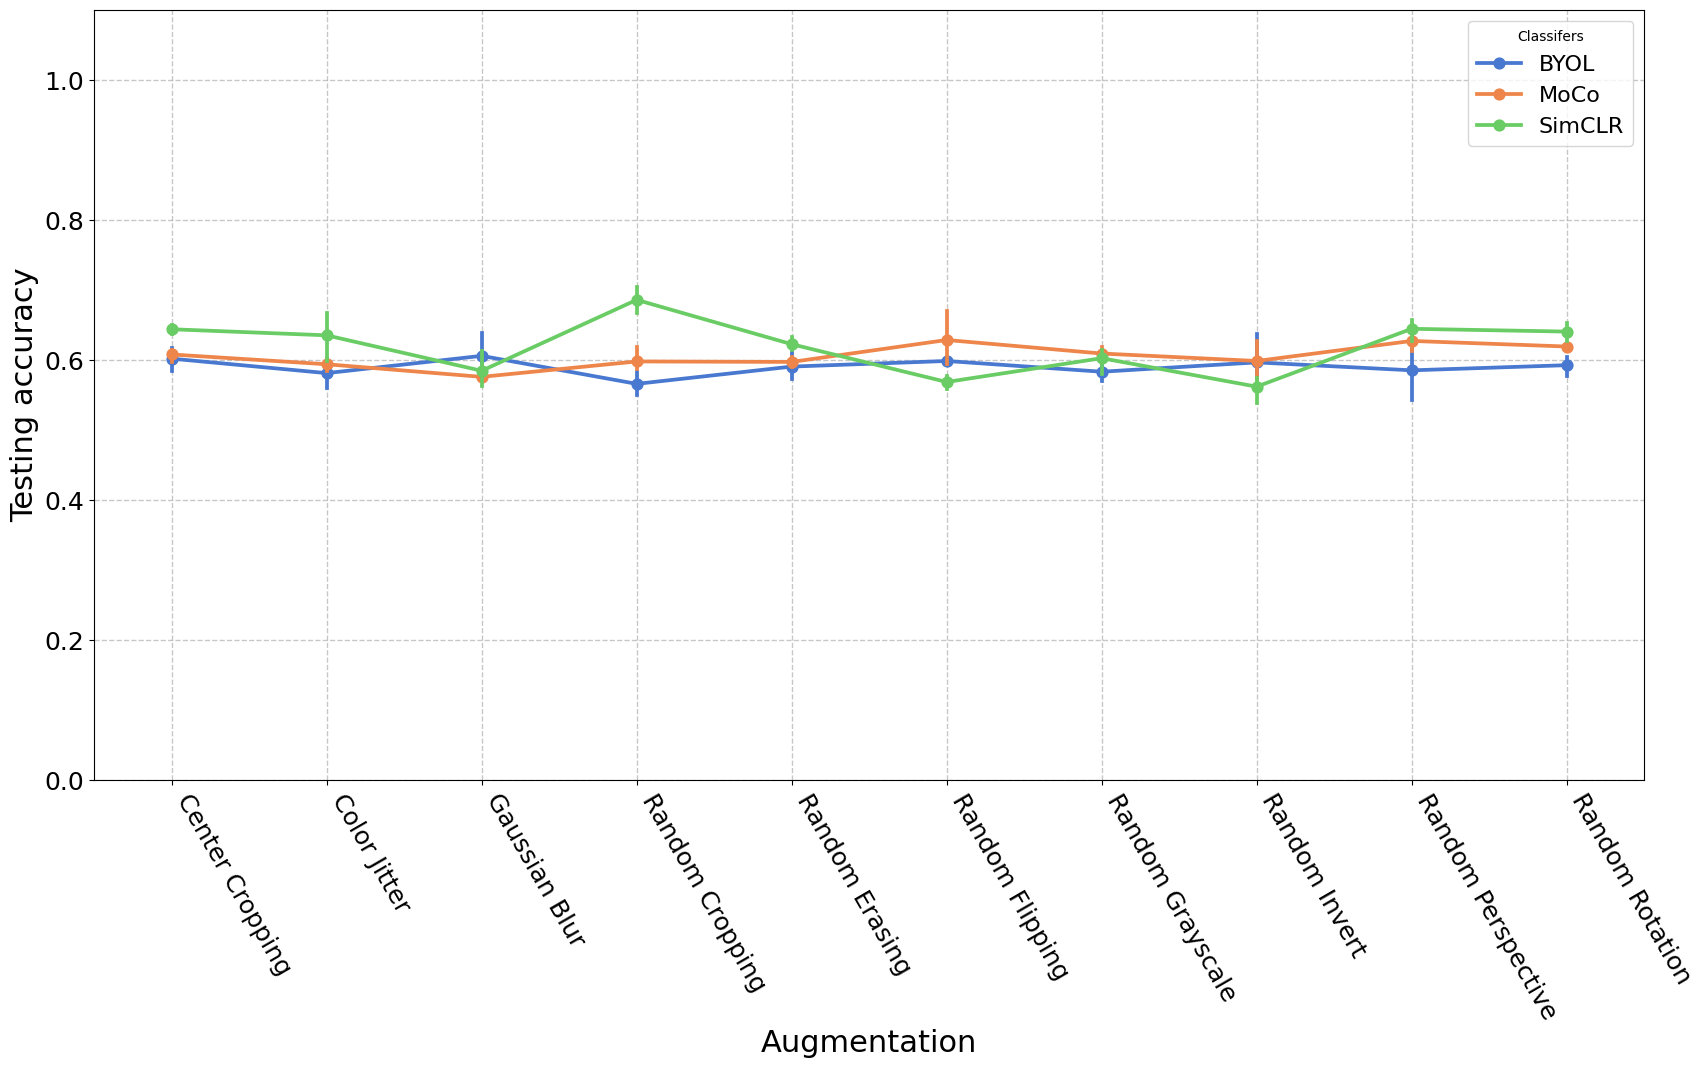

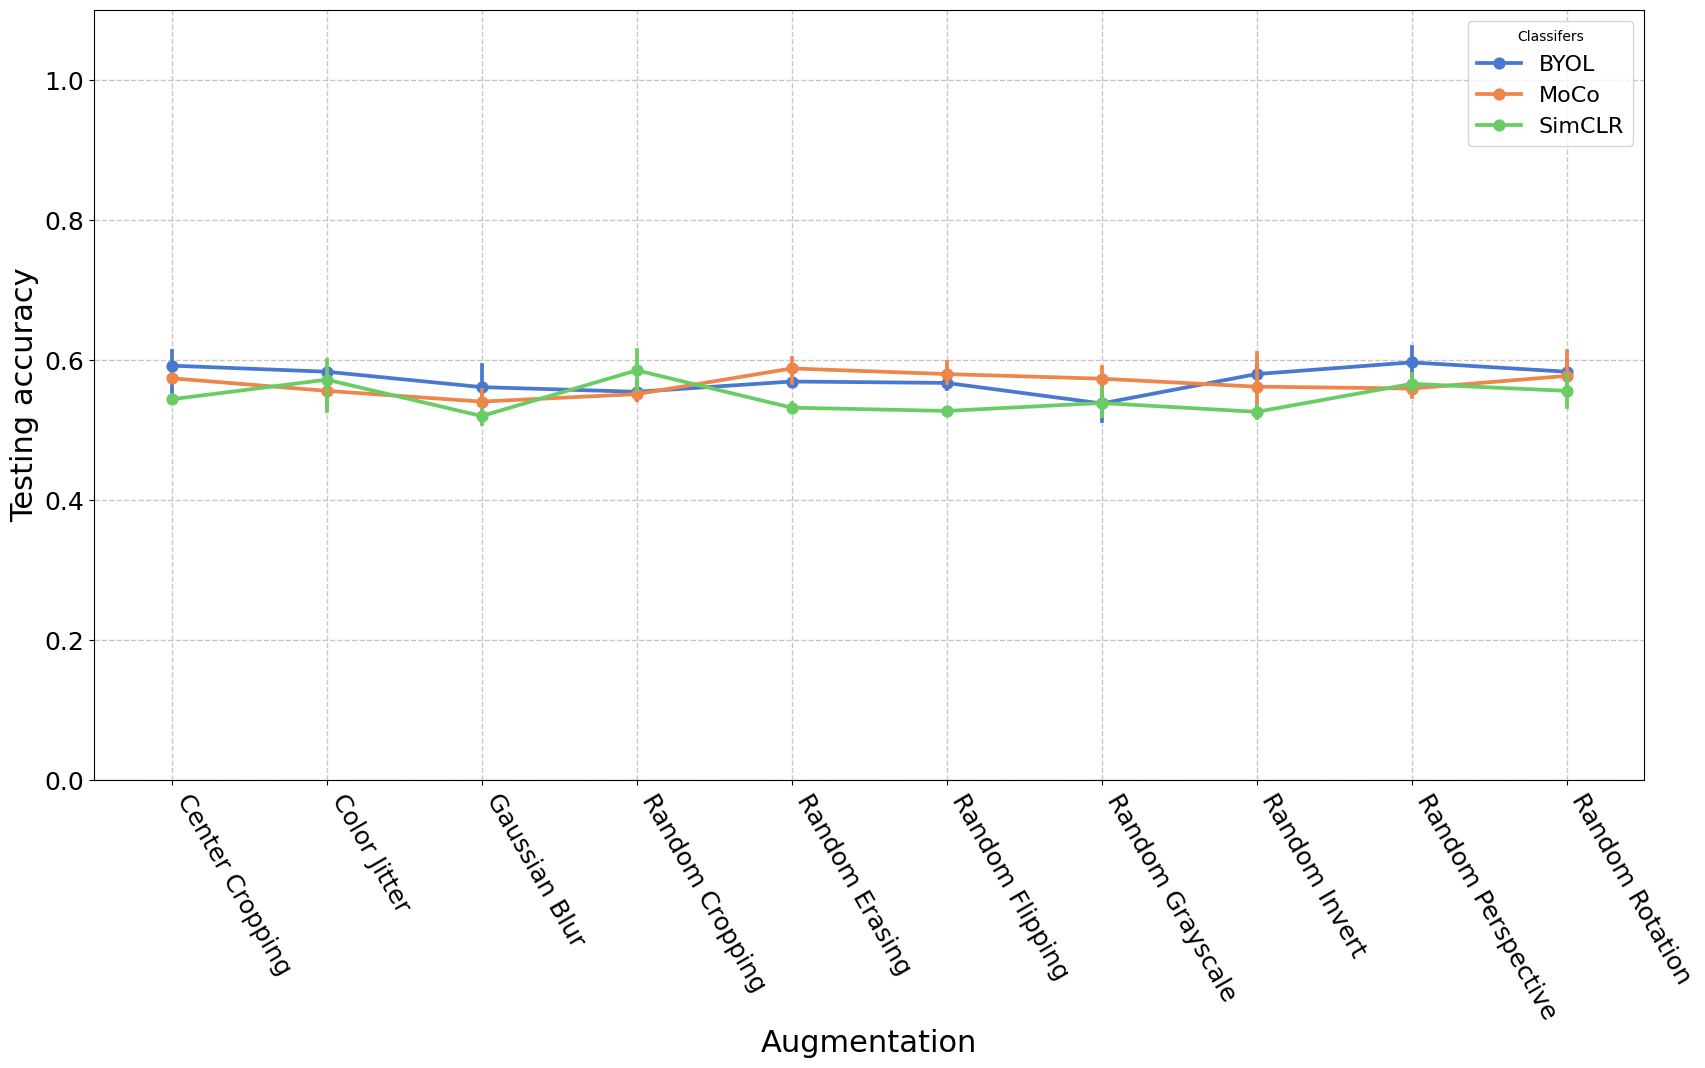

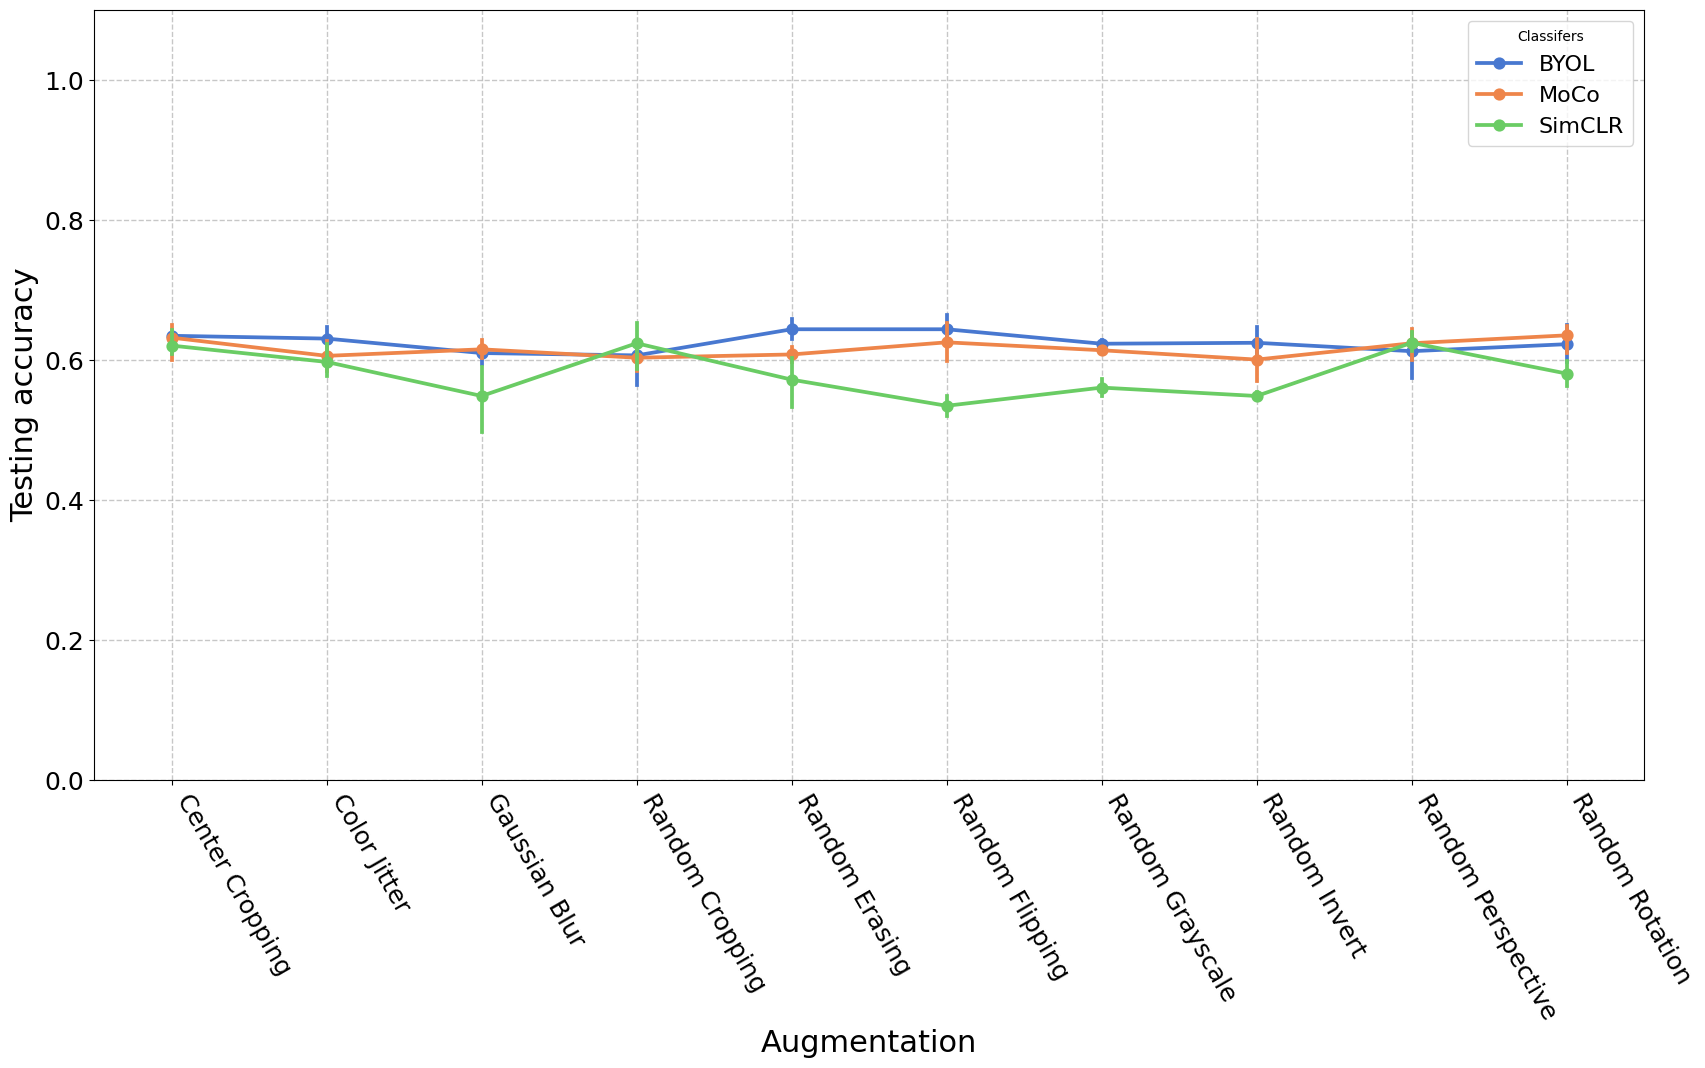

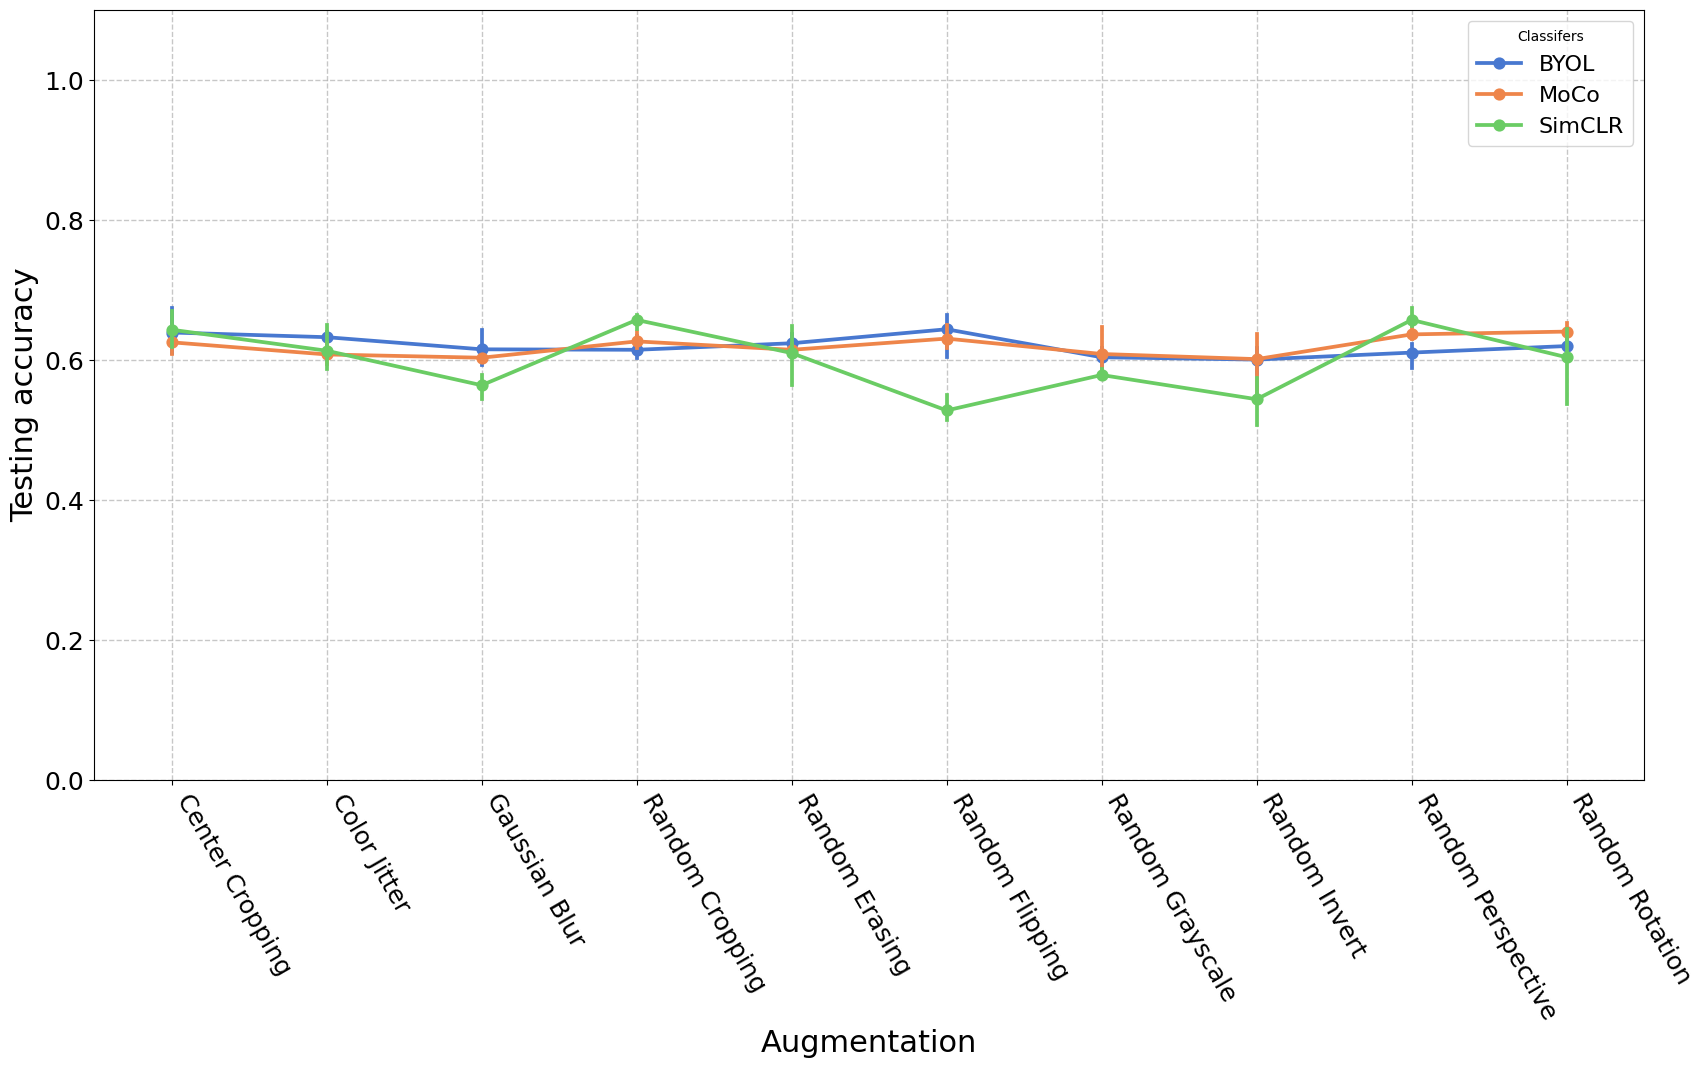

In [7]:
plot_point_plot_by_models(data[(data['classifier'] == 'Support Vector Machine') & (data['Dataset'] == 'Cat Dog')], 'Support Vector Machine on Cat Dog dataset')
plot_point_plot_by_models(data[(data['classifier'] == 'K-Nearest Neighbors') & (data['Dataset'] == 'Cat Dog')], 'K-Nearest Neighbors on Cat Dog dataset')
plot_point_plot_by_models(data[(data['classifier'] == 'Random Forest') & (data['Dataset'] == 'Cat Dog')], 'Random Forest on Cat Dog dataset')
plot_point_plot_by_models(data[(data['classifier'] == 'Neural Network') & (data['Dataset'] == 'Cat Dog')], 'Neural Network on Cat Dog dataset')

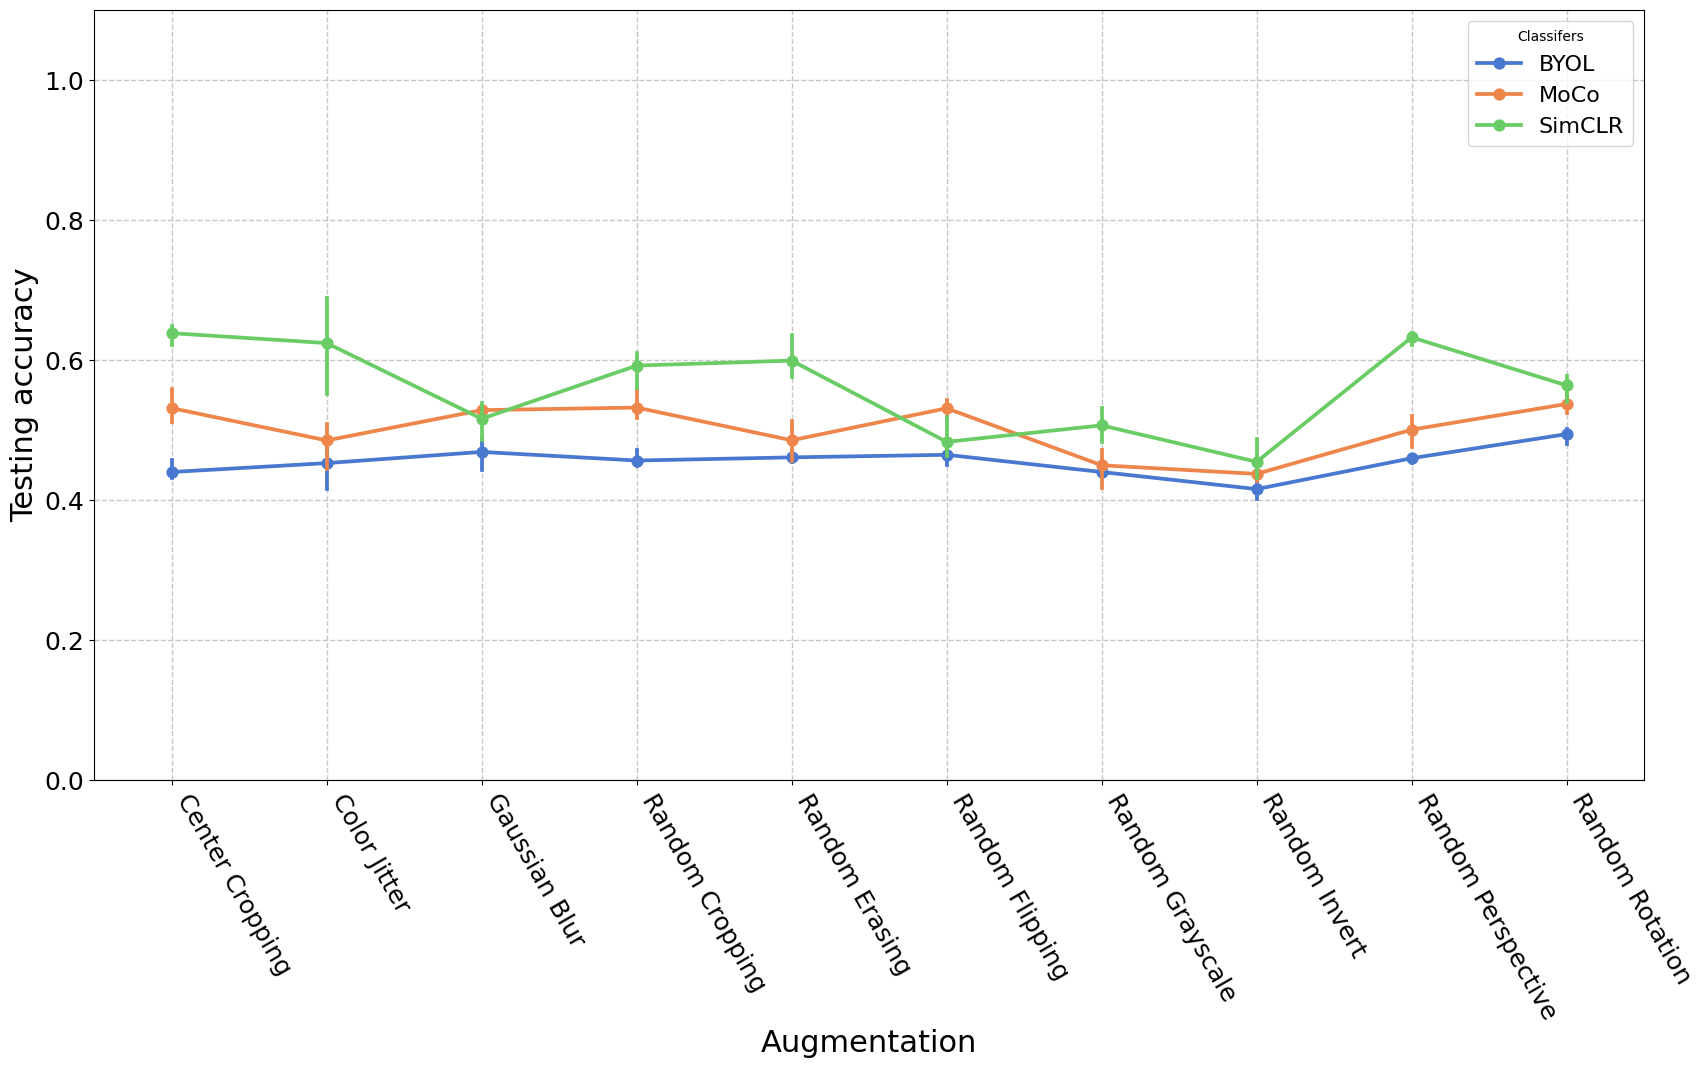

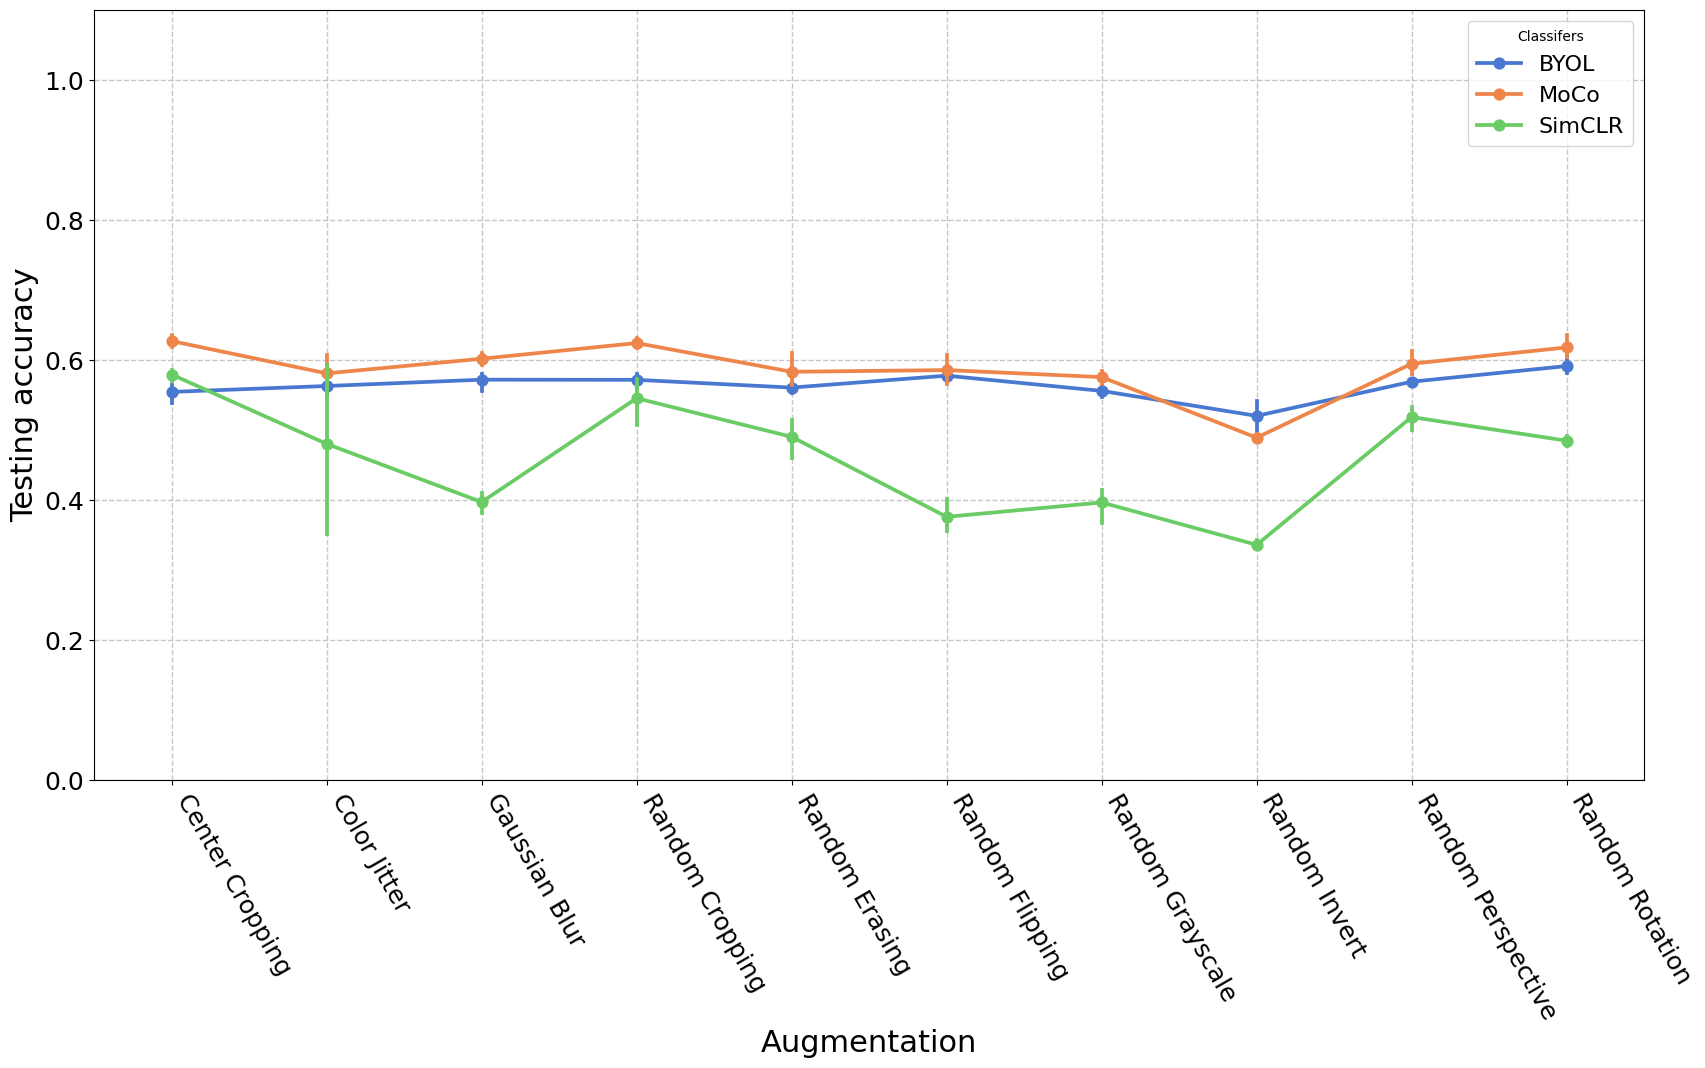

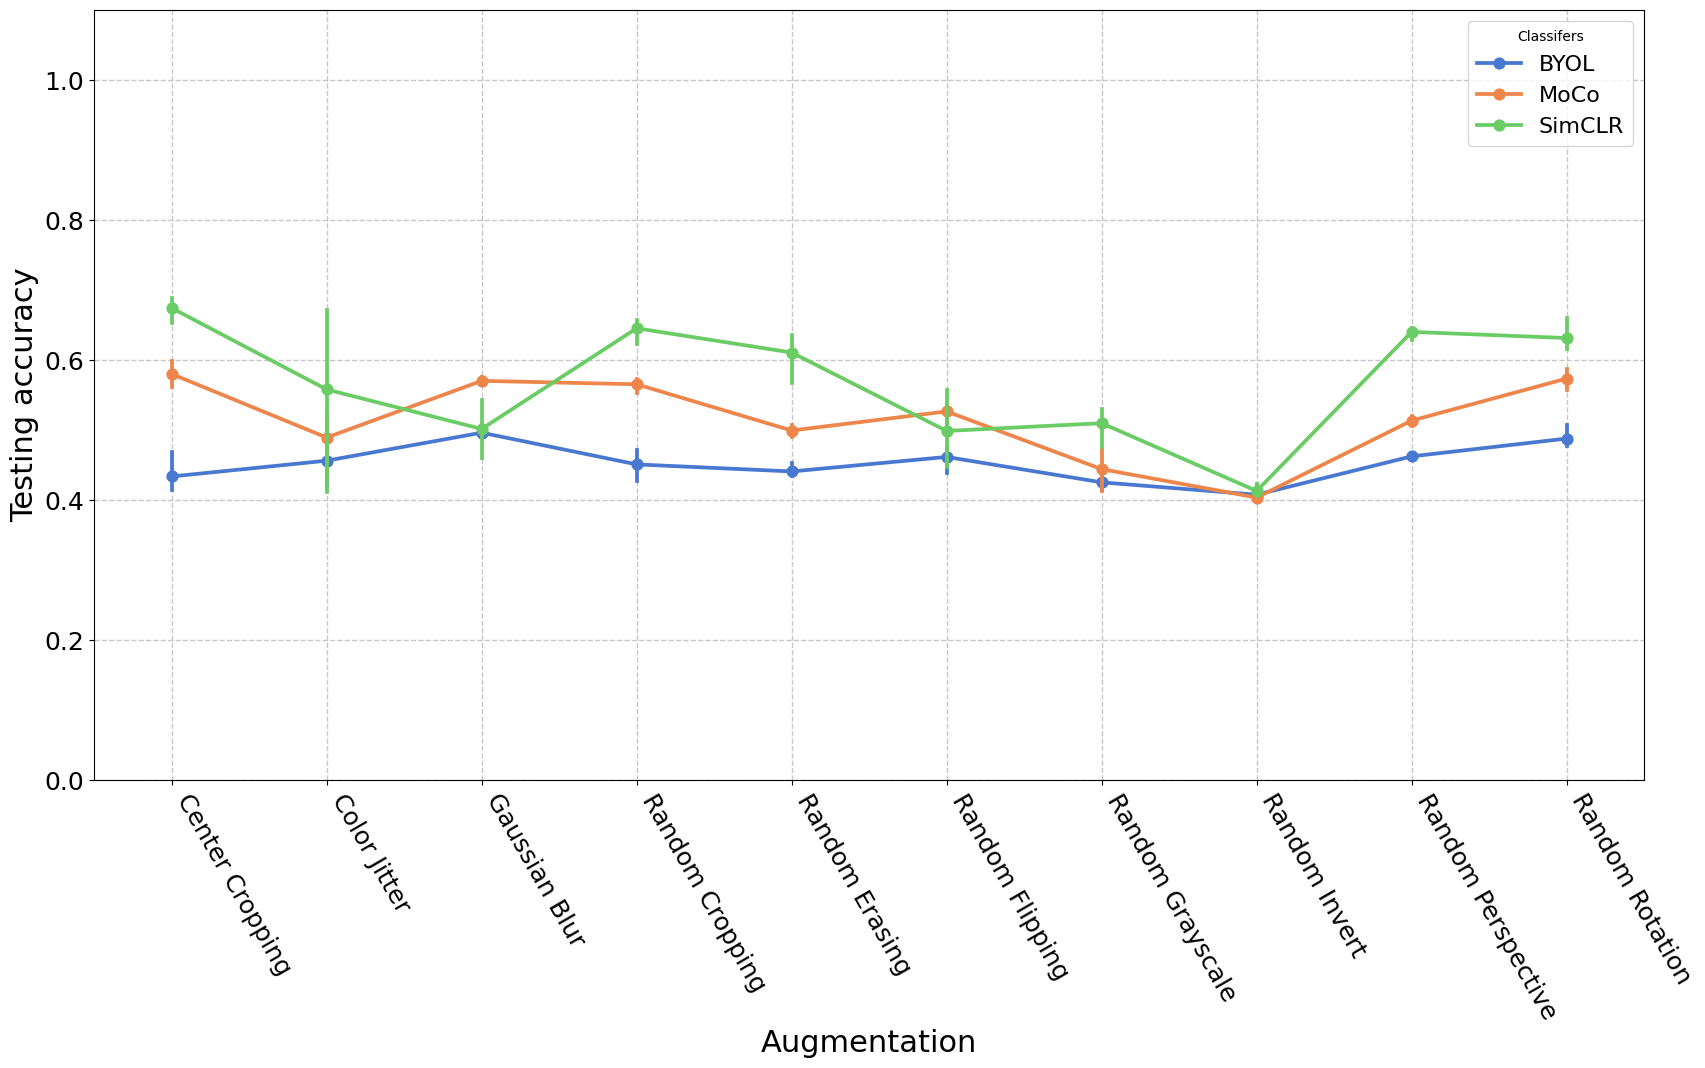

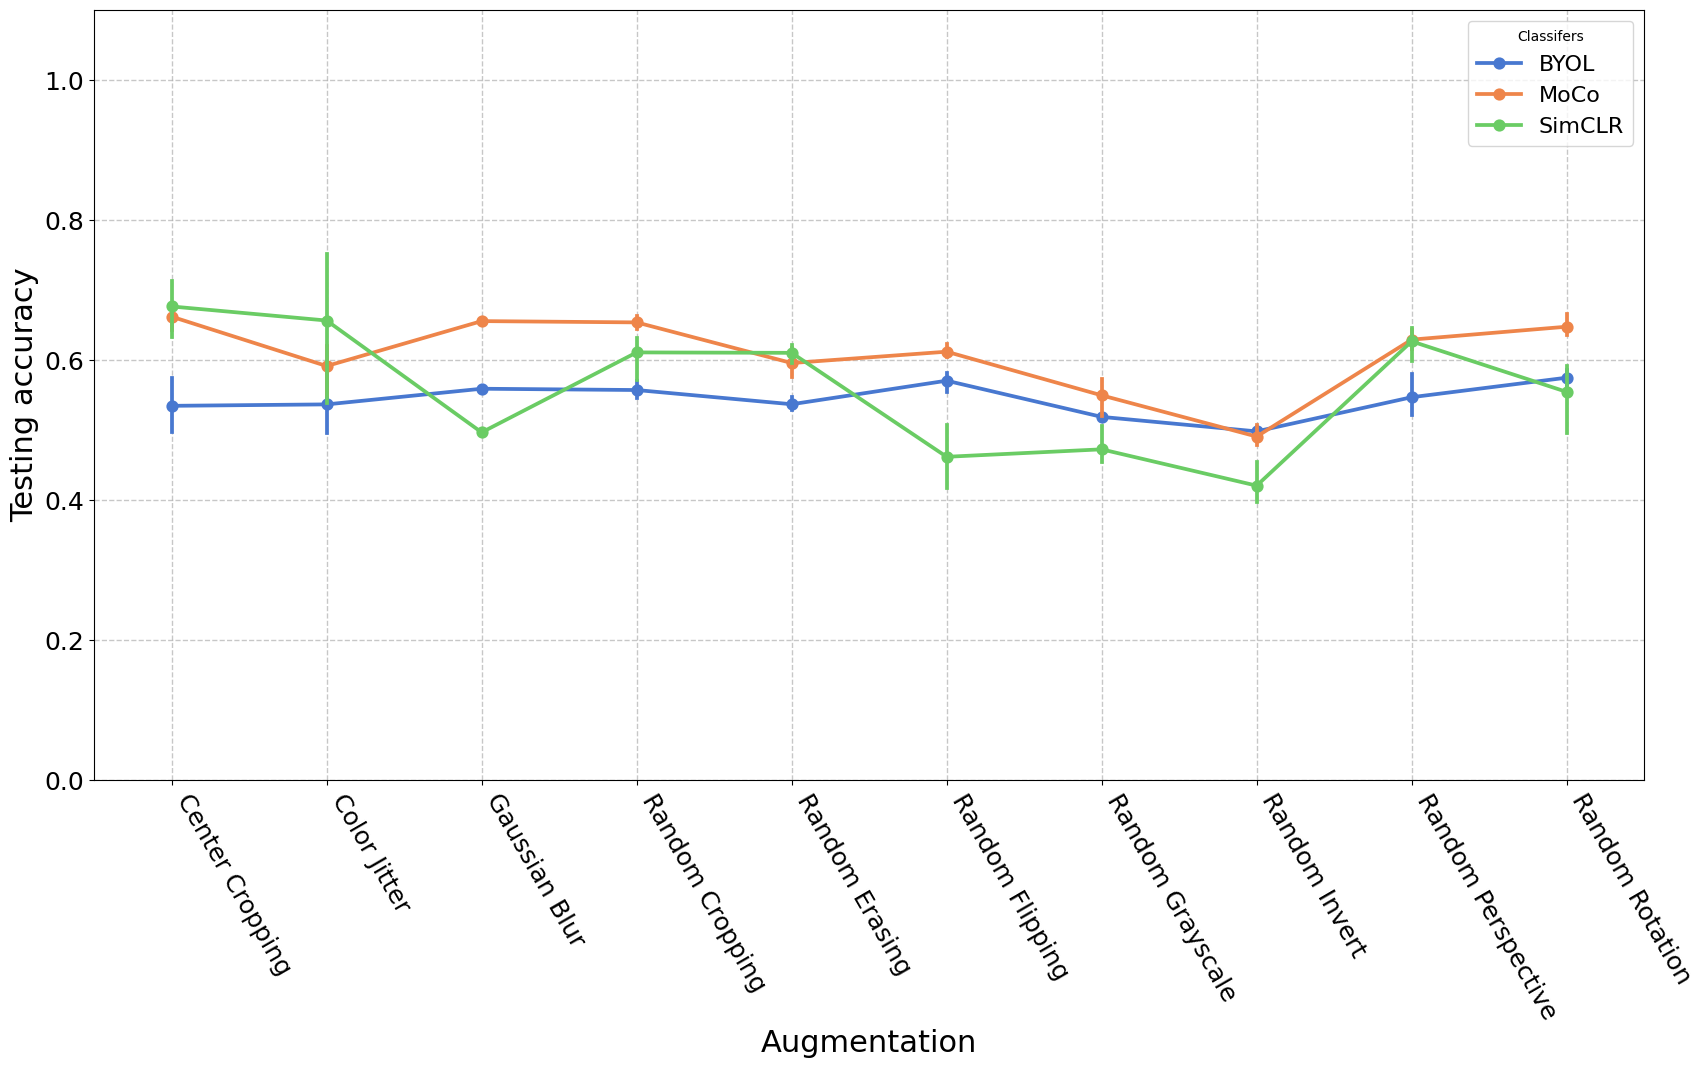

In [8]:
plot_point_plot_by_models(data[(data['classifier'] == 'Support Vector Machine') & (data['Dataset'] == 'Vehicles')], 'Support Vector Machine on Vehicles dataset')
plot_point_plot_by_models(data[(data['classifier'] == 'K-Nearest Neighbors') & (data['Dataset'] == 'Vehicles')], 'K-Nearest Neighbors on Vehicles dataset')
plot_point_plot_by_models(data[(data['classifier'] == 'Random Forest') & (data['Dataset'] == 'Vehicles')], 'Random Forest on Vehicles dataset')
plot_point_plot_by_models(data[(data['classifier'] == 'Neural Network') & (data['Dataset'] == 'Vehicles')], 'Neural Network on Vehicles dataset')

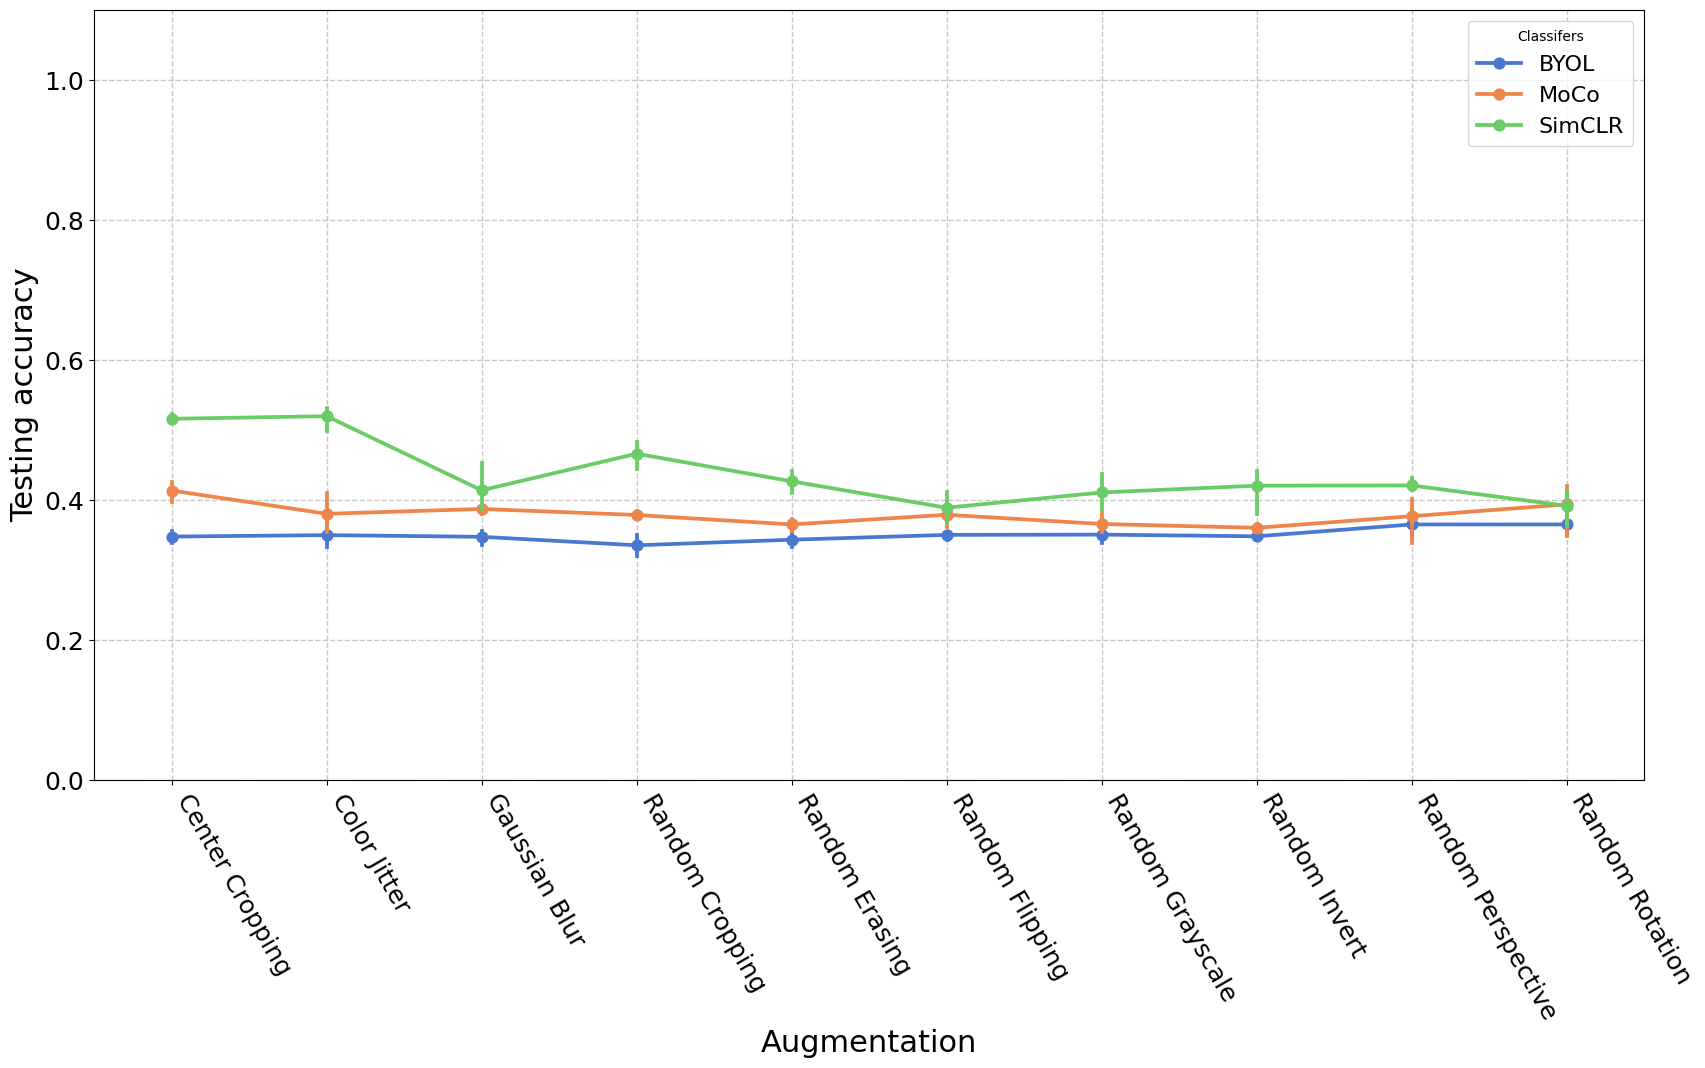

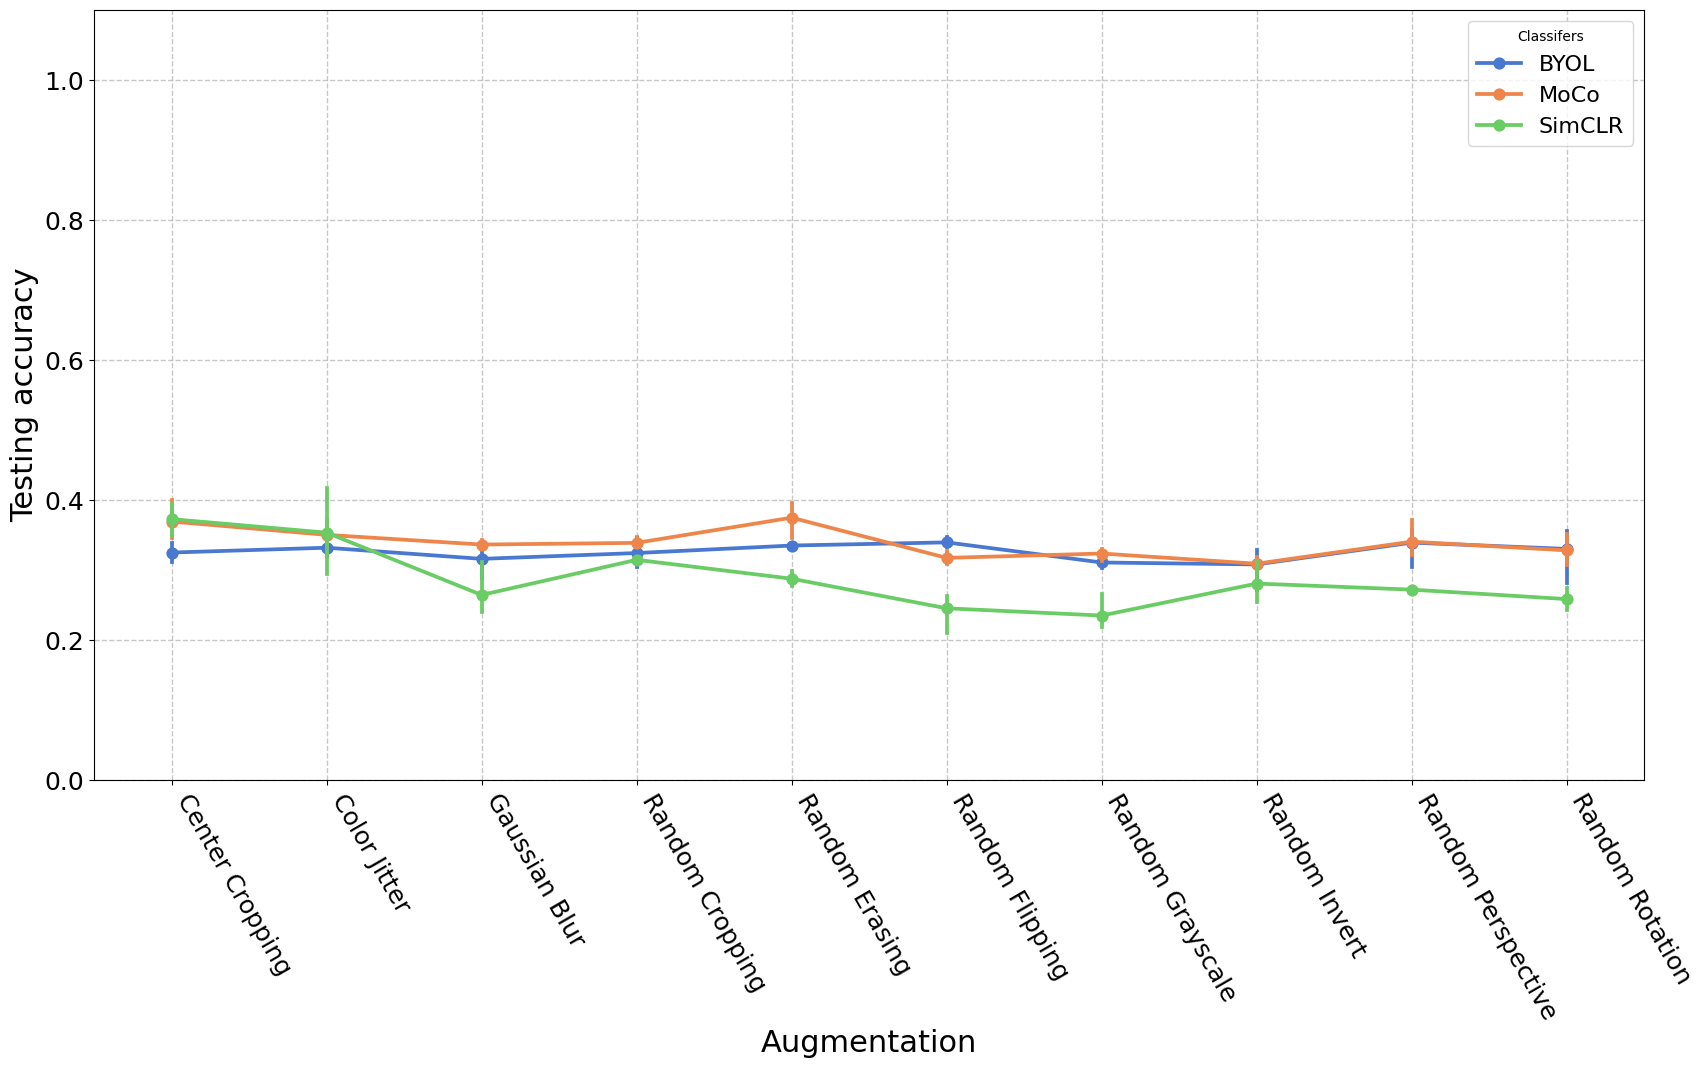

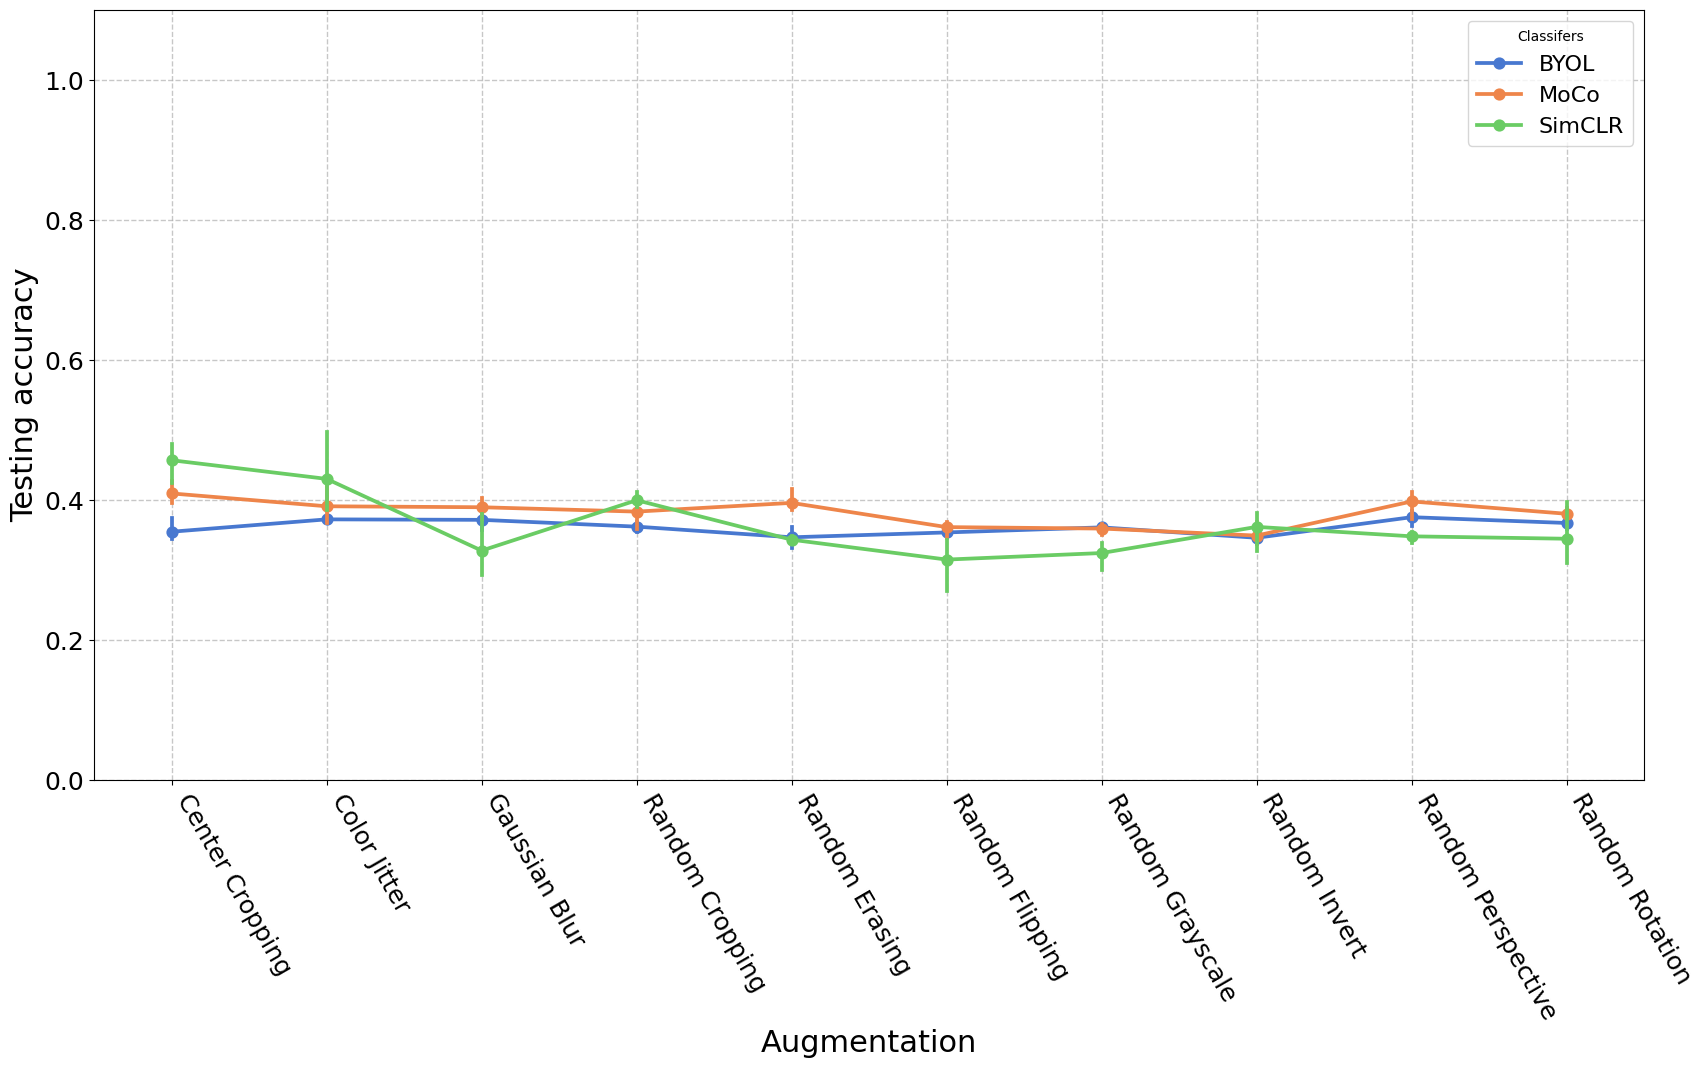

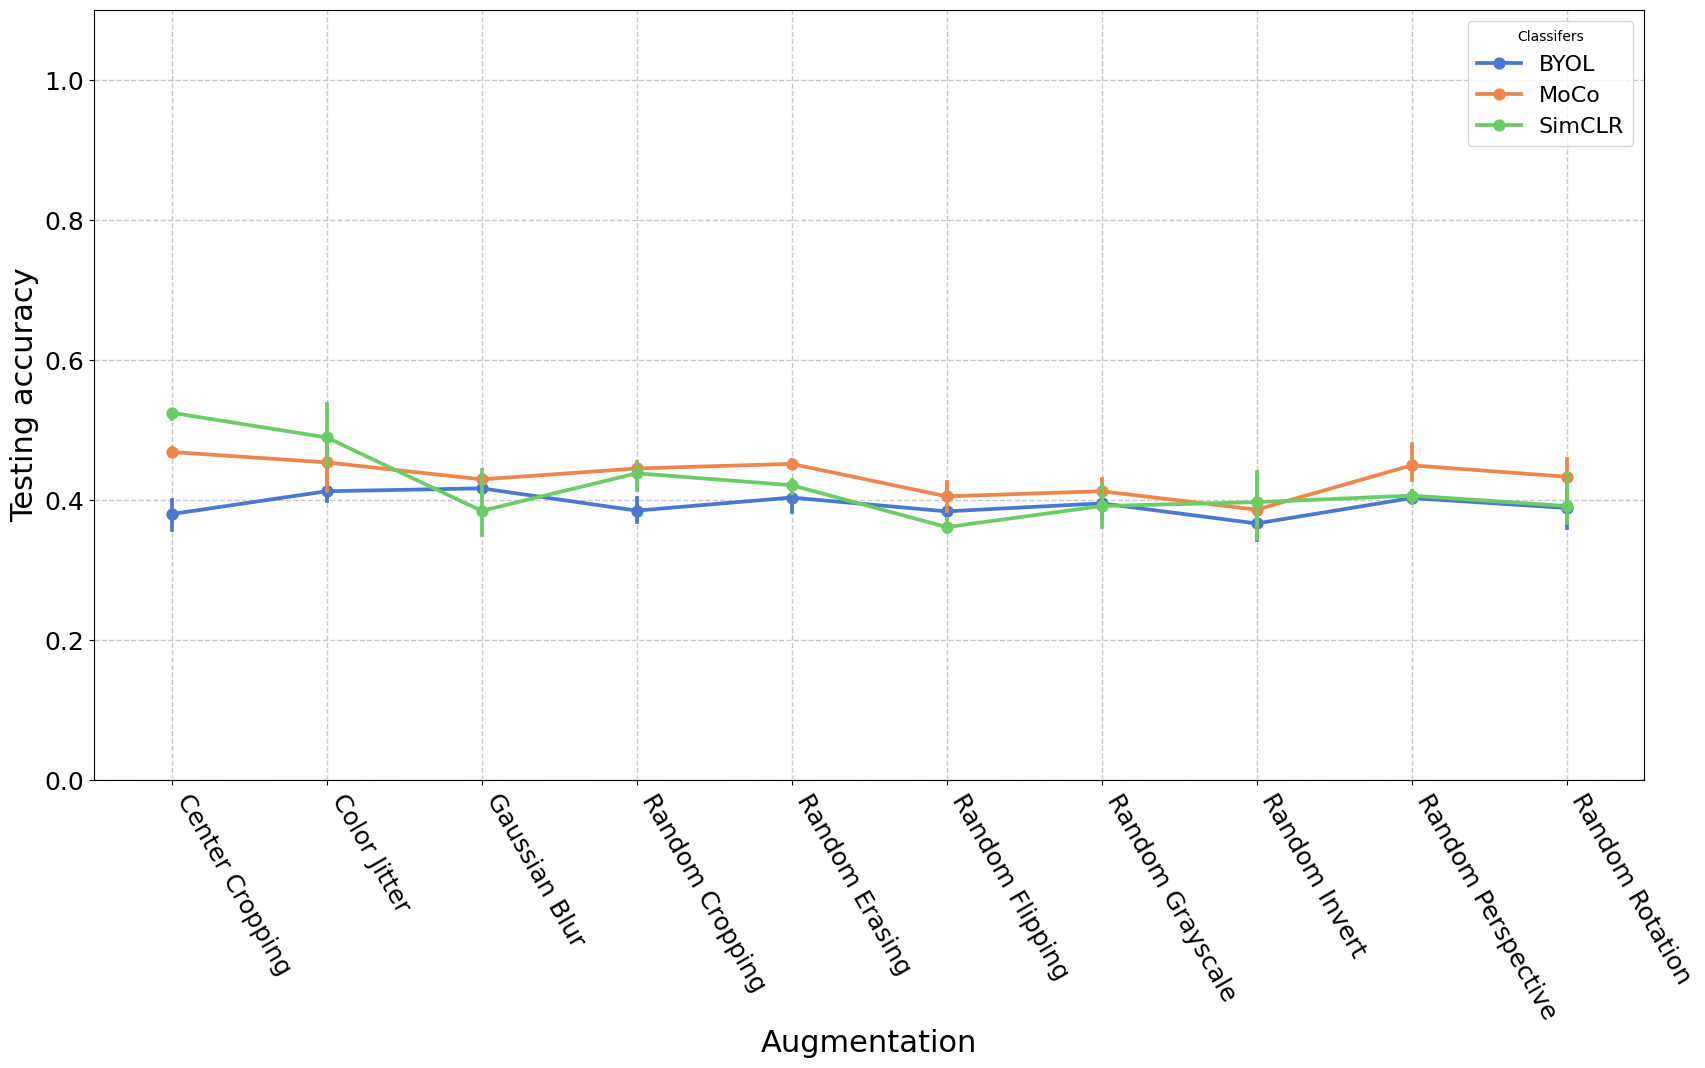

In [9]:
plot_point_plot_by_models(data[(data['classifier'] == 'Support Vector Machine') & (data['Dataset'] == 'Clothes')], 'Support Vector Machine on Clothing dataset')
plot_point_plot_by_models(data[(data['classifier'] == 'K-Nearest Neighbors') & (data['Dataset'] == 'Clothes')], 'K-Nearest Neighbors on Clothing dataset')
plot_point_plot_by_models(data[(data['classifier'] == 'Random Forest') & (data['Dataset'] == 'Clothes')], 'Random Forest on Clothing dataset')
plot_point_plot_by_models(data[(data['classifier'] == 'Neural Network') & (data['Dataset'] == 'Clothes')], 'Neural Network on Clothing dataset')

In [10]:
# def plot_point_plot_by_models(svm_data, knn_data, rf_data, nn_data, title):
#     fig, axes = plt.subplots(2, 2, figsize=(30, 15), sharex=True, sharey=True)
    
#     sns.pointplot(data=svm_data, x='augmentation', y='accuracy_test', hue='Model', ax=axes[0, 0])
#     axes[0, 0].set_title('Support Vector Machine', fontsize=20)
#     axes[0, 0].set_xlabel(' ', fontsize=16)
#     axes[0, 0].set_ylabel(' ', fontsize=16)
#     axes[0, 0].set_ylim(0, 1.1)
#     axes[0, 0].grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
#     axes[0, 0].tick_params(axis='x', rotation=90, labelsize=14)
#     axes[0, 0].tick_params(axis='y', labelsize=14)
#     axes[0, 0].get_legend().remove()

#     sns.pointplot(data=knn_data, x='augmentation', y='accuracy_test', hue='Model', ax=axes[0, 1])
#     axes[0, 1].set_title('K-Nearest Neighbors', fontsize=20)
#     axes[0, 1].set_xlabel(' ', fontsize=16)
#     axes[0, 1].set_ylabel(' ', fontsize=16)
#     axes[0, 1].set_ylim(0, 1.1)
#     axes[0, 1].grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
#     axes[0, 1].tick_params(axis='x', rotation=90, labelsize=14)
#     axes[0, 1].tick_params(axis='y', labelsize=14)
#     axes[0, 1].get_legend().remove()

#     sns.pointplot(data=rf_data, x='augmentation', y='accuracy_test', hue='Model', ax=axes[1, 0])
#     axes[1, 0].set_title('Random Forest', fontsize=20)
#     axes[1, 0].set_xlabel(' ', fontsize=16)
#     axes[1, 0].set_ylabel(' ', fontsize=16)
#     axes[1, 0].set_ylim(0, 1.1)
#     axes[1, 0].grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
#     axes[1, 0].tick_params(axis='x', rotation=90, labelsize=14)
#     axes[1, 0].tick_params(axis='y', labelsize=14)
#     axes[1, 0].get_legend().remove()

#     sns.pointplot(data=nn_data, x='augmentation', y='accuracy_test', hue='Model', ax=axes[1, 1])
#     axes[1, 1].set_title('Neural Network', fontsize=20)
#     axes[1, 1].set_xlabel(' ', fontsize=16)
#     axes[1, 1].set_ylabel(' ', fontsize=16)
#     axes[1, 1].set_ylim(0, 1.1)
#     axes[1, 1].grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
#     axes[1, 1].tick_params(axis='x', rotation=90, labelsize=14)
#     axes[1, 1].tick_params(axis='y', labelsize=14)
#     axes[1, 1].get_legend().remove()
    
#     fig.text(0, 0.6, 'Accuracy', va='center', rotation='vertical', fontsize=20, weight='bold')
#     fig.text(0.5, 0.02, 'Augmentation', ha='center', va='center', fontsize=20, weight='bold')
    
#     # Getting handles and labels from the first subplot
#     handles, labels = axes[0, 0].get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 0.95), fontsize=16)
    
#     plt.suptitle(title, fontsize=24, weight='bold')
#     plt.tight_layout(pad=3.0)
#     plt.savefig(f'{title}.pdf', bbox_inches='tight')
#     plt.show()


In [11]:
# # svm_binary_data = data[(data['classifier'] == 'Support Vector Machine') & (data['Dataset'] == 'Cat Dog')]
# knn_binary_data = data[(data['classifier'] == 'K-Nearest Neighbors') & (data['Dataset'] == 'Cat Dog')]
# rf_binary_data = data[(data['classifier'] == 'Random Forest') & (data['Dataset'] == 'Cat Dog')]
# nn_binary_data = data[(data['classifier'] == 'Neural Network') & (data['Dataset'] == 'Cat Dog')]
# plot_point_plot_by_models(svm_binary_data, knn_binary_data, rf_binary_data, nn_binary_data, 'Accuracies of all models on Cat and Dog dataset')

In [12]:
# svm_vehicle_data = data[(data['classifier'] == 'Support Vector Machine') & (data['Dataset'] == 'Vehicles')]
# knn_vehicle_data = data[(data['classifier'] == 'K-Nearest Neighbors') & (data['Dataset'] == 'Vehicles')]
# rf_vehicle_data = data[(data['classifier'] == 'Random Forest') & (data['Dataset'] == 'Vehicles')]
# nn_vehicle_data = data[(data['classifier'] == 'Neural Network') & (data['Dataset'] == 'Vehicles')]
# plot_point_plot_by_models(svm_vehicle_data, knn_vehicle_data, rf_vehicle_data, nn_vehicle_data, 'Accuracies of all models on Vehicles dataset')

In [13]:
# svm_clothing_data = data[(data['classifier'] == 'Support Vector Machine') & (data['Dataset'] == 'Clothes')]
# knn_clothing_data = data[(data['classifier'] == 'K-Nearest Neighbors') & (data['Dataset'] == 'Clothes')]
# rf_clothing_data = data[(data['classifier'] == 'Random Forest') & (data['Dataset'] == 'Clothes')]
# nn_clothing_data = data[(data['classifier'] == 'Neural Network') & (data['Dataset'] == 'Clothes')]
# plot_point_plot_by_models(svm_clothing_data, knn_clothing_data, rf_clothing_data, nn_clothing_data, 'Accuracies of all models on Clothing dataset')

In [14]:
# plot_point_plot_by_models(data[(data["dataset"] == "binary_class") & (data["classifier"] == "Support Vector Machine")], "Cat and Dog SVM")
# plot_point_plot_by_models(data[(data["dataset"] == "binary_class") & (data["classifier"] == "K-Nearest Neighbors")], "Cat and Dog KNN")
# plot_point_plot_by_models(data[(data["dataset"] == "binary_class") & (data["classifier"] == "Random Forest")], "Cat and Dog RF")
# plot_point_plot_by_models(data[(data["dataset"] == "binary_class") & (data["classifier"] == "Neural Network")], "Cat and Dog NN")

In [15]:
# plt.figure(figsize=(20, 10))
# sns.lineplot(data=data[data['dataset'] == 'binary_class'], x='augmentation', y='accuracy_test', hue='classifier', style='Model', markers=True, dashes=False)
# plt.ylim(0, 1.1)

In [16]:
# def plot_testing_accuracies(seed_zero_data, seed_42_data, seed_123_data, title):
#     fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
#     sns.barplot(ax=axes[0], x='augmentation', y='accuracy_test', hue='Model', data=seed_zero_data)
#     axes[0].set_title('Seed Zero')
#     axes[0].set_ylim(0, 1.1)
#     axes[0].grid(True, linestyle='dashed')
#     axes[0].tick_params(axis='x', rotation=90)
#     axes[0].set_xlabel('')
#     axes[0].set_ylabel('')
#     axes[0].get_legend().remove()

#     sns.barplot(ax=axes[1], x='augmentation', y='accuracy_test', hue='Model', data=seed_42_data)
#     axes[1].set_title('Seed 42')
#     axes[1].set_ylim(0, 1.1)
#     axes[1].grid(True, linestyle='dashed')
#     axes[1].tick_params(axis='x', rotation=90)
#     axes[1].set_xlabel('')
#     axes[1].set_ylabel('')
#     axes[1].get_legend().remove()

#     sns.barplot(ax=axes[2], x='augmentation', y='accuracy_test', hue='Model', data=seed_123_data)
#     axes[2].set_title('Seed 123')
#     axes[2].set_ylim(0, 1.1)
#     axes[2].grid(True, linestyle='dashed')
#     axes[2].tick_params(axis='x', rotation=90)
#     axes[2].set_xlabel('')
#     axes[2].set_ylabel('')
#     axes[2].get_legend().remove()

#     fig.text(0, 0.6, 'Accuracy', va='center', rotation='vertical', fontsize=12, weight='bold')
#     fig.text(0.5, 0.02, 'Augmentation', ha='center', va='center', fontsize=12, weight='bold')
#     handles, labels = axes[0].get_legend_handles_labels()
#     fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 0.95), fontsize=12)
#     plt.suptitle(title, fontsize= 14, weight='bold')
#     plt.tight_layout(pad=2.0)
#     path = f"/home/chaitanya/Academics/Research and Development/plotting/saved_plots/comparisions/{title}.pdf"
#     plt.savefig(path)
#     plt.show()

In [17]:
# simclr_svm_seed_zero_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Support Vector Machine") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_svm_seed_zero_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Support Vector Machine") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_svm_seed_zero_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Support Vector Machine") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_svm_seed_zero_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_svm_seed_zero_binary_class_accuracies['Model'] = 'BYOL'
# moco_svm_seed_zero_binary_class_accuracies['Model'] = "MOCO"
# combined_seed_zero_accuracies = pd.concat([simclr_svm_seed_zero_binary_class_accuracies, byol_svm_seed_zero_binary_class_accuracies, moco_svm_seed_zero_binary_class_accuracies])

# simclr_svm_seed_42_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Support Vector Machine") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_svm_seed_42_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Support Vector Machine") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_svm_seed_42_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Support Vector Machine") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_svm_seed_42_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_svm_seed_42_binary_class_accuracies['Model'] = 'BYOL'
# moco_svm_seed_42_binary_class_accuracies['Model'] = "MOCO"
# combined_seed_42_accuracies = pd.concat([simclr_svm_seed_42_binary_class_accuracies, byol_svm_seed_42_binary_class_accuracies, moco_svm_seed_42_binary_class_accuracies])

# simclr_svm_seed_123_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Support Vector Machine") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_svm_seed_123_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Support Vector Machine") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_svm_seed_123_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Support Vector Machine") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_svm_seed_123_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_svm_seed_123_binary_class_accuracies['Model'] = 'BYOL'
# moco_svm_seed_123_binary_class_accuracies['Model'] = "MOCO"
# combined_seed_123_accuracies = pd.concat([simclr_svm_seed_123_binary_class_accuracies, byol_svm_seed_123_binary_class_accuracies, moco_svm_seed_123_binary_class_accuracies])

In [18]:
# plot_testing_accuracies(combined_seed_zero_accuracies, combined_seed_42_accuracies, combined_seed_123_accuracies, 'SVM Testing accuracies for Binary Class Dataset')

In [19]:
# simclr_seed_zero_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Support Vector Machine") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_seed_zero_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Support Vector Machine") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_seed_zero_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Support Vector Machine") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_seed_zero_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_seed_zero_vehicles_accuracies['Model'] = 'BYOL'
# moco_seed_zero_vehicles_accuracies['Model'] = "MOCO"
# combined_seed_zero_vehicles_accuracies = pd.concat([simclr_seed_zero_vehicles_accuracies, byol_seed_zero_vehicles_accuracies, moco_seed_zero_vehicles_accuracies])

# simclr_seed_42_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Support Vector Machine") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_seed_42_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Support Vector Machine") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_seed_42_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Support Vector Machine") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_seed_42_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_seed_42_vehicles_accuracies['Model'] = 'BYOL'
# moco_seed_42_vehicles_accuracies['Model'] = "MOCO"
# combined_seed_42_vehicles_accuracies = pd.concat([simclr_seed_42_vehicles_accuracies, byol_seed_42_vehicles_accuracies, moco_seed_42_vehicles_accuracies])

# simclr_seed_123_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Support Vector Machine") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_seed_123_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Support Vector Machine") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_seed_123_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Support Vector Machine") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_seed_123_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_seed_123_vehicles_accuracies['Model'] = 'BYOL'
# moco_seed_123_vehicles_accuracies['Model'] = "MOCO"
# combined_seed_123_vehicles_accuracies = pd.concat([simclr_seed_123_vehicles_accuracies, byol_seed_123_vehicles_accuracies, moco_seed_123_vehicles_accuracies])

In [20]:
# plot_testing_accuracies(combined_seed_zero_vehicles_accuracies, combined_seed_42_vehicles_accuracies, combined_seed_123_vehicles_accuracies, 'SVM Testing accuracies for Vehicles Dataset')

In [21]:
# simclr_svm_seed_zero_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Support Vector Machine") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_svm_seed_zero_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Support Vector Machine") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_svm_seed_zero_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Support Vector Machine") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_svm_seed_zero_clothes_accuracies['Model'] = 'SIMCLR'
# byol_svm_seed_zero_clothes_accuracies['Model'] = 'BYOL'
# moco_svm_seed_zero_clothes_accuracies['Model'] = "MOCO"
# combined_seed_zero_clothes_accuracies = pd.concat([simclr_svm_seed_zero_clothes_accuracies, byol_svm_seed_zero_clothes_accuracies, moco_svm_seed_zero_clothes_accuracies])

# simclr_svm_seed_42_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Support Vector Machine") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_svm_seed_42_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Support Vector Machine") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_svmm_seed_42_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Support Vector Machine") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_svm_seed_42_clothes_accuracies['Model'] = 'SIMCLR'
# byol_svm_seed_42_clothes_accuracies['Model'] = 'BYOL'
# moco_svmm_seed_42_clothes_accuracies['Model'] = "MOCO"
# combined_seed_42_clothes_accuracies = pd.concat([simclr_svm_seed_42_clothes_accuracies, byol_svm_seed_42_clothes_accuracies, moco_svmm_seed_42_clothes_accuracies])

# simclr_svm_seed_123_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Support Vector Machine") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_svm_seed_123_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Support Vector Machine") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_svm_seed_123_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Support Vector Machine") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_svm_seed_123_clothes_accuracies['Model'] = 'SIMCLR'
# byol_svm_seed_123_clothes_accuracies['Model'] = 'BYOL'
# moco_svm_seed_123_clothes_accuracies['Model'] = "MOCO"
# combined_seed_123_clothes_accuracies = pd.concat([simclr_svm_seed_123_clothes_accuracies, byol_svm_seed_123_clothes_accuracies, moco_svm_seed_123_clothes_accuracies])

In [22]:
# plot_testing_accuracies(combined_seed_zero_clothes_accuracies, combined_seed_42_clothes_accuracies, combined_seed_123_clothes_accuracies, 'SVM Testing accuracies for Clothing Dataset')

In [23]:
# simclr_knn_seed_zero_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "K-Nearest Neighbors") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_knn_seed_zero_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "K-Nearest Neighbors") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_knn_seed_zero_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "K-Nearest Neighbors") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_knn_seed_zero_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_knn_seed_zero_binary_class_accuracies['Model'] = 'BYOL'
# moco_knn_seed_zero_binary_class_accuracies['Model'] = "MOCO"
# combined_knn_seed_zero_accuracies = pd.concat([simclr_knn_seed_zero_binary_class_accuracies, byol_knn_seed_zero_binary_class_accuracies, moco_knn_seed_zero_binary_class_accuracies])

# simclr_knn_seed_42_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "K-Nearest Neighbors") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_knn_seed_42_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "K-Nearest Neighbors") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_knn_seed_42_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "K-Nearest Neighbors") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_knn_seed_42_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_knn_seed_42_binary_class_accuracies['Model'] = 'BYOL'
# moco_knn_seed_42_binary_class_accuracies['Model'] = "MOCO"
# combined_knn_seed_42_accuracies = pd.concat([simclr_knn_seed_42_binary_class_accuracies, byol_knn_seed_42_binary_class_accuracies, moco_knn_seed_42_binary_class_accuracies])

# simclr_knn_seed_123_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "K-Nearest Neighbors") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_knn_seed_123_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "K-Nearest Neighbors") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_knn_seed_123_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "K-Nearest Neighbors") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_knn_seed_123_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_knn_seed_123_binary_class_accuracies['Model'] = 'BYOL'
# moco_knn_seed_123_binary_class_accuracies['Model'] = "MOCO"
# combined_knn_seed_123_accuracies = pd.concat([simclr_knn_seed_123_binary_class_accuracies, byol_knn_seed_123_binary_class_accuracies, moco_knn_seed_123_binary_class_accuracies])

In [24]:
# plot_testing_accuracies(combined_knn_seed_zero_accuracies, combined_knn_seed_42_accuracies, combined_knn_seed_123_accuracies, 'KNN Testing accuracies for Binary Class Dataset')

In [25]:
# simclr_knn_seed_zero_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "K-Nearest Neighbors") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_knn_seed_zero_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "K-Nearest Neighbors") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_knn_seed_zero_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "K-Nearest Neighbors") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_knn_seed_zero_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_knn_seed_zero_vehicles_accuracies['Model'] = 'BYOL'
# moco_knn_seed_zero_vehicles_accuracies['Model'] = "MOCO"
# combined_knn_seed_zero_vehicles_accuracies = pd.concat([simclr_knn_seed_zero_vehicles_accuracies, byol_knn_seed_zero_vehicles_accuracies, moco_knn_seed_zero_vehicles_accuracies])

# simclr_knn_seed_42_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "K-Nearest Neighbors") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_knn_seed_42_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "K-Nearest Neighbors") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_knn_seed_42_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "K-Nearest Neighbors") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_knn_seed_42_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_knn_seed_42_vehicles_accuracies['Model'] = 'BYOL'
# moco_knn_seed_42_vehicles_accuracies['Model'] = "MOCO"
# combined_knn_seed_42_vehicles_accuracies = pd.concat([simclr_knn_seed_42_vehicles_accuracies, byol_knn_seed_42_vehicles_accuracies, moco_knn_seed_42_vehicles_accuracies])

# simclr_knn_seed_123_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "K-Nearest Neighbors") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_knn_seed_123_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "K-Nearest Neighbors") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_knn_seed_123_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "K-Nearest Neighbors") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_knn_seed_123_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_knn_seed_123_vehicles_accuracies['Model'] = 'BYOL'
# moco_knn_seed_123_vehicles_accuracies['Model'] = "MOCO"
# combined_knn_seed_123_vehicles_accuracies = pd.concat([simclr_knn_seed_123_vehicles_accuracies, byol_knn_seed_123_vehicles_accuracies, moco_knn_seed_123_vehicles_accuracies])

In [26]:
# plot_testing_accuracies(combined_knn_seed_zero_vehicles_accuracies, combined_knn_seed_42_vehicles_accuracies, combined_knn_seed_123_vehicles_accuracies, 'KNN Testing accuracies for Vehicles Dataset')

In [27]:
# simclr_knn_seed_zero_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "K-Nearest Neighbors") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_knn_seed_zero_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "K-Nearest Neighbors") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_knn_seed_zero_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "K-Nearest Neighbors") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_knn_seed_zero_clothes_accuracies['Model'] = 'SIMCLR'
# byol_knn_seed_zero_clothes_accuracies['Model'] = 'BYOL'
# moco_knn_seed_zero_clothes_accuracies['Model'] = "MOCO"
# combined_knn_seed_zero_clothes_accuracies = pd.concat([simclr_knn_seed_zero_clothes_accuracies, byol_knn_seed_zero_clothes_accuracies, moco_knn_seed_zero_clothes_accuracies])

# simclr_knn_seed_42_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "K-Nearest Neighbors") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_knn_seed_42_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "K-Nearest Neighbors") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_knn_seed_42_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "K-Nearest Neighbors") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_knn_seed_42_clothes_accuracies['Model'] = 'SIMCLR'
# byol_knn_seed_42_clothes_accuracies['Model'] = 'BYOL'
# moco_knn_seed_42_clothes_accuracies['Model'] = "MOCO"
# combined_knn_seed_42_clothes_accuracies = pd.concat([simclr_knn_seed_42_clothes_accuracies, byol_knn_seed_42_clothes_accuracies, moco_knn_seed_42_clothes_accuracies])

# simclr_knn_seed_123_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "K-Nearest Neighbors") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_knn_seed_123_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "K-Nearest Neighbors") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_knn_seed_123_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "K-Nearest Neighbors") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_knn_seed_123_clothes_accuracies['Model'] = 'SIMCLR'
# byol_knn_seed_123_clothes_accuracies['Model'] = 'BYOL'
# moco_knn_seed_123_clothes_accuracies['Model'] = "MOCO"
# combined_knn_seed_123_clothes_accuracies = pd.concat([simclr_knn_seed_123_clothes_accuracies, byol_knn_seed_123_clothes_accuracies, moco_knn_seed_123_clothes_accuracies])

In [28]:
# plot_testing_accuracies(combined_knn_seed_zero_clothes_accuracies, combined_knn_seed_42_clothes_accuracies, combined_knn_seed_123_clothes_accuracies, 'KNN Testing accuracies for Clothing Dataset')

In [29]:
# simclr_rf_seed_zero_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Random Forest") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_rf_seed_zero_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Random Forest") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_rf_seed_zero_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Random Forest") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_rf_seed_zero_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_rf_seed_zero_binary_class_accuracies['Model'] = 'BYOL'
# moco_rf_seed_zero_binary_class_accuracies['Model'] = "MOCO"
# combined_rf_seed_zero_accuracies = pd.concat([simclr_rf_seed_zero_binary_class_accuracies, byol_rf_seed_zero_binary_class_accuracies, moco_rf_seed_zero_binary_class_accuracies])

# simclr_rf_seed_42_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Random Forest") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()  
# byol_rf_seed_42_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Random Forest") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_rf_seed_42_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Random Forest") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_rf_seed_42_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_rf_seed_42_binary_class_accuracies['Model'] = 'BYOL'
# moco_rf_seed_42_binary_class_accuracies['Model'] = "MOCO"
# combined_rf_seed_42_accuracies = pd.concat([simclr_rf_seed_42_binary_class_accuracies, byol_rf_seed_42_binary_class_accuracies, moco_rf_seed_42_binary_class_accuracies])

# simclr_rf_seed_123_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Random Forest") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_rf_seed_123_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Random Forest") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_rf_seed_123_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Random Forest") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_rf_seed_123_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_rf_seed_123_binary_class_accuracies['Model'] = 'BYOL'
# moco_rf_seed_123_binary_class_accuracies['Model'] = "MOCO"
# combined_rf_seed_123_accuracies = pd.concat([simclr_rf_seed_123_binary_class_accuracies, byol_rf_seed_123_binary_class_accuracies, moco_rf_seed_123_binary_class_accuracies])

In [30]:
# plot_testing_accuracies(combined_rf_seed_zero_accuracies, combined_rf_seed_42_accuracies, combined_rf_seed_123_accuracies, 'Random Forest Testing accuracies for Binary Class Dataset') 

In [31]:
# simclr_rf_seed_zero_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Random Forest") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_rf_seed_zero_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Random Forest") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_rf_seed_zero_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Random Forest") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_rf_seed_zero_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_rf_seed_zero_vehicles_accuracies['Model'] = 'BYOL'
# moco_rf_seed_zero_vehicles_accuracies['Model'] = "MOCO"
# combined_rf_seed_zero_vehicles_accuracies = pd.concat([simclr_rf_seed_zero_vehicles_accuracies, byol_rf_seed_zero_vehicles_accuracies, moco_rf_seed_zero_vehicles_accuracies])

# simclr_rf_seed_42_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Random Forest") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_rf_seed_42_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Random Forest") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_rf_seed_42_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Random Forest") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_rf_seed_42_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_rf_seed_42_vehicles_accuracies['Model'] = 'BYOL'
# moco_rf_seed_42_vehicles_accuracies['Model'] = "MOCO"
# combined_rf_seed_42_vehicles_accuracies = pd.concat([simclr_rf_seed_42_vehicles_accuracies, byol_rf_seed_42_vehicles_accuracies, moco_rf_seed_42_vehicles_accuracies])

# simclr_rf_seed_123_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Random Forest") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_rf_seed_123_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Random Forest") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_rf_seed_123_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Random Forest") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_rf_seed_123_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_rf_seed_123_vehicles_accuracies['Model'] = 'BYOL'
# moco_rf_seed_123_vehicles_accuracies['Model'] = "MOCO"
# combined_rf_seed_123_vehicles_accuracies = pd.concat([simclr_rf_seed_123_vehicles_accuracies, byol_rf_seed_123_vehicles_accuracies, moco_rf_seed_123_vehicles_accuracies])

In [32]:
# plot_testing_accuracies(combined_rf_seed_zero_vehicles_accuracies, combined_rf_seed_42_vehicles_accuracies, combined_rf_seed_123_vehicles_accuracies, 'Random Forest Testing accuracies for Vehicles Dataset')

In [33]:
# simclr_rf_seed_zero_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Random Forest") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_rf_seed_zero_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Random Forest") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_rf_seed_zero_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Random Forest") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_rf_seed_zero_clothes_accuracies['Model'] = 'SIMCLR'
# byol_rf_seed_zero_clothes_accuracies['Model'] = 'BYOL'
# moco_rf_seed_zero_clothes_accuracies['Model'] = "MOCO"
# combined_rf_seed_zero_clothes_accuracies = pd.concat([simclr_rf_seed_zero_clothes_accuracies, byol_rf_seed_zero_clothes_accuracies, moco_rf_seed_zero_clothes_accuracies])

# simclr_rf_seed_42_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Random Forest") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_rf_seed_42_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Random Forest") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_rf_seed_42_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Random Forest") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_rf_seed_42_clothes_accuracies['Model'] = 'SIMCLR'
# byol_rf_seed_42_clothes_accuracies['Model'] = 'BYOL'
# moco_rf_seed_42_clothes_accuracies['Model'] = "MOCO"
# combined_rf_seed_42_clothes_accuracies = pd.concat([simclr_rf_seed_42_clothes_accuracies, byol_rf_seed_42_clothes_accuracies, moco_rf_seed_42_clothes_accuracies])

# simclr_rf_seed_123_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Random Forest") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_rf_seed_123_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Random Forest") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_rf_seed_123_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Random Forest") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_rf_seed_123_clothes_accuracies['Model'] = 'SIMCLR'
# byol_rf_seed_123_clothes_accuracies['Model'] = 'BYOL'
# moco_rf_seed_123_clothes_accuracies['Model'] = "MOCO"
# combined_rf_seed_123_clothes_accuracies = pd.concat([simclr_rf_seed_123_clothes_accuracies, byol_rf_seed_123_clothes_accuracies, moco_rf_seed_123_clothes_accuracies])

In [34]:
# plot_testing_accuracies(combined_rf_seed_zero_clothes_accuracies, combined_rf_seed_42_clothes_accuracies, combined_rf_seed_123_clothes_accuracies, 'Random Forest Testing accuracies for Clothing Dataset')

In [35]:
# simclr_nn_seed_zero_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Neural Network") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_nn_seed_zero_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Neural Network") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_nn_seed_zero_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Neural Network") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_nn_seed_zero_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_nn_seed_zero_binary_class_accuracies['Model'] = 'BYOL'
# moco_nn_seed_zero_binary_class_accuracies['Model'] = "MOCO"
# combined_nn_seed_zero_accuracies = pd.concat([simclr_nn_seed_zero_binary_class_accuracies, byol_nn_seed_zero_binary_class_accuracies, moco_nn_seed_zero_binary_class_accuracies])

# simclr_nn_seed_42_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Neural Network") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_nn_seed_42_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Neural Network") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_nn_seed_42_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Neural Network") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_nn_seed_42_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_nn_seed_42_binary_class_accuracies['Model'] = 'BYOL'
# moco_nn_seed_42_binary_class_accuracies['Model'] = "MOCO"
# combined_nn_seed_42_accuracies = pd.concat([simclr_nn_seed_42_binary_class_accuracies, byol_nn_seed_42_binary_class_accuracies, moco_nn_seed_42_binary_class_accuracies])

# simclr_nn_seed_123_binary_class_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Neural Network") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "binary_class"))].copy()
# byol_nn_seed_123_binary_class_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Neural Network") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "binary_class"))].copy()
# moco_nn_seed_123_binary_class_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Neural Network") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "binary_class"))].copy()
# simclr_nn_seed_123_binary_class_accuracies['Model'] = 'SIMCLR'
# byol_nn_seed_123_binary_class_accuracies['Model'] = 'BYOL'
# moco_nn_seed_123_binary_class_accuracies['Model'] = "MOCO"
# combined_nn_seed_123_accuracies = pd.concat([simclr_nn_seed_123_binary_class_accuracies, byol_nn_seed_123_binary_class_accuracies, moco_nn_seed_123_binary_class_accuracies])

In [36]:
# plot_testing_accuracies(combined_nn_seed_zero_accuracies, combined_nn_seed_42_accuracies, combined_nn_seed_123_accuracies, 'Neural Network Testing accuracies for Binary Class Dataset')

In [37]:
# simclr_nn_seed_zero_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Neural Network") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_nn_seed_zero_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Neural Network") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_nn_seed_zero_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Neural Network") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_nn_seed_zero_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_nn_seed_zero_vehicles_accuracies['Model'] = 'BYOL'
# moco_nn_seed_zero_vehicles_accuracies['Model'] = "MOCO"
# combined_nn_seed_zero_vehicles_accuracies = pd.concat([simclr_nn_seed_zero_vehicles_accuracies, byol_nn_seed_zero_vehicles_accuracies, moco_nn_seed_zero_vehicles_accuracies])

# simclr_nn_seed_42_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Neural Network") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_nn_seed_42_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Neural Network") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_nn_seed_42_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Neural Network") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_nn_seed_42_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_nn_seed_42_vehicles_accuracies['Model'] = 'BYOL'
# moco_nn_seed_42_vehicles_accuracies['Model'] = "MOCO"
# combined_nn_seed_42_vehicles_accuracies = pd.concat([simclr_nn_seed_42_vehicles_accuracies, byol_nn_seed_42_vehicles_accuracies, moco_nn_seed_42_vehicles_accuracies])

# simclr_nn_seed_123_vehicles_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Neural Network") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "vehicles"))].copy()
# byol_nn_seed_123_vehicles_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Neural Network") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "vehicles"))].copy()
# moco_nn_seed_123_vehicles_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Neural Network") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "vehicles"))].copy()
# simclr_nn_seed_123_vehicles_accuracies['Model'] = 'SIMCLR'
# byol_nn_seed_123_vehicles_accuracies['Model'] = 'BYOL'
# moco_nn_seed_123_vehicles_accuracies['Model'] = "MOCO"
# combined_nn_seed_123_vehicles_accuracies = pd.concat([simclr_nn_seed_123_vehicles_accuracies, byol_nn_seed_123_vehicles_accuracies, moco_nn_seed_123_vehicles_accuracies])

In [38]:
# plot_testing_accuracies(combined_nn_seed_zero_vehicles_accuracies, combined_nn_seed_42_vehicles_accuracies, combined_nn_seed_123_vehicles_accuracies, 'Neural Network Testing accuracies for Vehicles Dataset')

In [39]:
# simclr_nn_seed_zero_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Neural Network") & (simclr_accuracies["seed"] == "seed 0") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_nn_seed_zero_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Neural Network") & (byol_accuracies["seed"] == "seed 0") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_nn_seed_zero_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Neural Network") & (moco_accuracies["seed"] == "seed 0") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_nn_seed_zero_clothes_accuracies['Model'] = 'SIMCLR'
# byol_nn_seed_zero_clothes_accuracies['Model'] = 'BYOL'
# moco_nn_seed_zero_clothes_accuracies['Model'] = "MOCO"
# combined_nn_seed_zero_clothes_accuracies = pd.concat([simclr_nn_seed_zero_clothes_accuracies, byol_nn_seed_zero_clothes_accuracies, moco_nn_seed_zero_clothes_accuracies])

# simclr_nn_seed_42_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Neural Network") & (simclr_accuracies["seed"] == "seed 42") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_nn_seed_42_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Neural Network") & (byol_accuracies["seed"] == "seed 42") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_nn_seed_42_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Neural Network") & (moco_accuracies["seed"] == "seed 42") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_nn_seed_42_clothes_accuracies['Model'] = 'SIMCLR'
# byol_nn_seed_42_clothes_accuracies['Model'] = 'BYOL'
# moco_nn_seed_42_clothes_accuracies['Model'] = "MOCO"
# combined_nn_seed_42_clothes_accuracies = pd.concat([simclr_nn_seed_42_clothes_accuracies, byol_nn_seed_42_clothes_accuracies, moco_nn_seed_42_clothes_accuracies])

# simclr_nn_seed_123_clothes_accuracies = simclr_accuracies[(simclr_accuracies["classifier"] == "Neural Network") & (simclr_accuracies["seed"] == "seed 123") & ((simclr_accuracies["dataset"] == "clothing"))].copy()
# byol_nn_seed_123_clothes_accuracies = byol_accuracies[(byol_accuracies["classifier"] == "Neural Network") & (byol_accuracies["seed"] == "seed 123") & ((byol_accuracies["dataset"] == "clothing"))].copy()
# moco_nn_seed_123_clothes_accuracies = moco_accuracies[(moco_accuracies["classifier"] == "Neural Network") & (moco_accuracies["seed"] == "seed 123") & ((moco_accuracies["dataset"] == "clothing"))].copy()
# simclr_nn_seed_123_clothes_accuracies['Model'] = 'SIMCLR'
# byol_nn_seed_123_clothes_accuracies['Model'] = 'BYOL'
# moco_nn_seed_123_clothes_accuracies['Model'] = "MOCO"
# combined_nn_seed_123_clothes_accuracies = pd.concat([simclr_nn_seed_123_clothes_accuracies, byol_nn_seed_123_clothes_accuracies, moco_nn_seed_123_clothes_accuracies])

In [40]:
# plot_testing_accuracies(combined_nn_seed_zero_clothes_accuracies, combined_nn_seed_42_clothes_accuracies, combined_nn_seed_123_clothes_accuracies, 'Neural Network Testing accuracies for Clothing Dataset')